In [2]:
# Load file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/los-angeles-crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv


In [3]:
# Import libraries
import pandas as pd
import numpy as np
from collections import Counter

import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Analysis of dataset characteristics

In [4]:
# Load data into Pandas dataframe
df_original = pd.read_csv('/kaggle/input/los-angeles-crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv')

In [5]:
# Examine first rows of data
df_original.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [6]:
# Get info on the dataframe properties
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918443 entries, 0 to 918442
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           918443 non-null  int64  
 1   Date Rptd       918443 non-null  object 
 2   DATE OCC        918443 non-null  object 
 3   TIME OCC        918443 non-null  int64  
 4   AREA            918443 non-null  int64  
 5   AREA NAME       918443 non-null  object 
 6   Rpt Dist No     918443 non-null  int64  
 7   Part 1-2        918443 non-null  int64  
 8   Crm Cd          918443 non-null  int64  
 9   Crm Cd Desc     918443 non-null  object 
 10  Mocodes         790151 non-null  object 
 11  Vict Age        918443 non-null  int64  
 12  Vict Sex        796365 non-null  object 
 13  Vict Descent    796356 non-null  object 
 14  Premis Cd       918433 non-null  float64
 15  Premis Desc     917886 non-null  object 
 16  Weapon Used Cd  317500 non-null  float64
 17  Weapon Des

In [7]:
# Get info on missing records
df_original.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           128292
Vict Age               0
Vict Sex          122078
Vict Descent      122087
Premis Cd             10
Premis Desc          557
Weapon Used Cd    600943
Weapon Desc       600943
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          851659
Crm Cd 3          916192
Crm Cd 4          918378
LOCATION               0
Cross Street      774119
LAT                    0
LON                    0
dtype: int64

In [8]:
df_original.describe(include='all')

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
count,9.184430e+05,918443,918443,918443.000000,918443.000000,918443,918443.000000,918443.000000,918443.000000,918443,...,918443,918443,918432.000000,66784.000000,2251.000000,65.000000,918443,144324,918443.000000,918443.000000
unique,NaN,1539,1539,NaN,NaN,21,NaN,NaN,NaN,139,...,6,6,NaN,NaN,NaN,NaN,65312,10087,NaN,NaN
top,NaN,02/03/2023 12:00:00 AM,01/01/2020 12:00:00 AM,NaN,NaN,Central,NaN,NaN,NaN,VEHICLE - STOLEN,...,IC,Invest Cont,NaN,NaN,NaN,NaN,800 N ALAMEDA ST,BROADWAY,NaN,NaN
freq,NaN,925,1137,NaN,NaN,62523,NaN,NaN,NaN,98614,...,734477,734477,NaN,NaN,NaN,NaN,1755,2369,NaN,NaN
mean,2.182520e+08,NaN,NaN,1337.260666,10.701887,NaN,1116.626374,1.410659,500.832354,NaN,...,NaN,NaN,500.575810,957.958104,983.730786,987.353846,NaN,NaN,33.989769,-118.062475
std,1.205523e+07,NaN,NaN,652.784076,6.101791,NaN,610.196881,0.491954,207.584858,NaN,...,NaN,NaN,207.377428,110.611792,52.636687,41.137130,NaN,NaN,1.693282,5.869872
min,8.170000e+02,NaN,NaN,1.000000,1.000000,NaN,101.000000,1.000000,110.000000,NaN,...,NaN,NaN,110.000000,210.000000,310.000000,740.000000,NaN,NaN,0.000000,-118.667600
25%,2.104105e+08,NaN,NaN,900.000000,6.000000,NaN,615.000000,1.000000,331.000000,NaN,...,NaN,NaN,331.000000,998.000000,998.000000,998.000000,NaN,NaN,34.014500,-118.429700
50%,2.205166e+08,NaN,NaN,1415.000000,11.000000,NaN,1141.000000,1.000000,442.000000,NaN,...,NaN,NaN,442.000000,998.000000,998.000000,998.000000,NaN,NaN,34.058700,-118.322100
75%,2.305083e+08,NaN,NaN,1900.000000,16.000000,NaN,1615.000000,2.000000,626.000000,NaN,...,NaN,NaN,626.000000,998.000000,998.000000,998.000000,NaN,NaN,34.163600,-118.273900


In [9]:
df_original.rename(columns={'Crm Cd 4': 'crime_code_4', 'Crm Cd 3': 'crime_code_3', 'Crm Cd 2': 'crime_code_2', 'Crm Cd 1': 'crime_code_1','Cross Street' : 'cross_street', 'Weapon Used Cd' : 'weapon_type', 'Weapon Desc' : 'weapon_desc', 'Mocodes' : 'mo_codes', 'Vict Descent' : 'victim_descent', 'Vict Sex' : 'victim_sex', 'Premis Desc' : 'premise_desc', 'Premis Cd' : 'premise_code', 'LAT' : 'lat', 'LOCATION' : 'location', 'Status Desc' : 'status_desc', 'Status' : 'status', 'DR_NO' : 'dr_no', 'Date Rptd' : 'date_rptd', 'Vict Age' : 'victim_age', 'Crm Cd Desc' : 'crime_code_desc', 'Crm Cd' : 'crime_code', 'Part 1-2' : 'part_1_2', 'Rpt Dist No' : 'sub_area_code', 'AREA NAME' : 'area_name', 'AREA' : 'area_code', 'TIME OCC' : 'time_occ', 'DATE OCC' : 'date_occ', 'LON' : 'long'}, inplace=True)

In [10]:
# Check number of unique values in each category
df_original.nunique()

dr_no              918443
date_rptd            1539
date_occ             1539
time_occ             1439
area_code              21
area_name              21
sub_area_code        1208
part_1_2                2
crime_code            139
crime_code_desc       139
mo_codes           299931
victim_age            104
victim_sex              5
victim_descent         20
premise_code          314
premise_desc          306
weapon_type            79
weapon_desc            79
status                  6
status_desc             6
crime_code_1          141
crime_code_2          126
crime_code_3           37
crime_code_4            7
location            65312
cross_street        10087
lat                  5415
long                 4974
dtype: int64

# Data Exploration

Victim Age occurrences count: 
      victim_age   count
0             0  231960
1            30   20771
2            35   20373
3            31   19863
4            29   19807
..          ...     ...
99           97      68
100          -2      21
101          -4       3
102          -3       2
103         120       1

[104 rows x 2 columns]


Text(0.5, 1.0, 'Victim Age occurrences count')

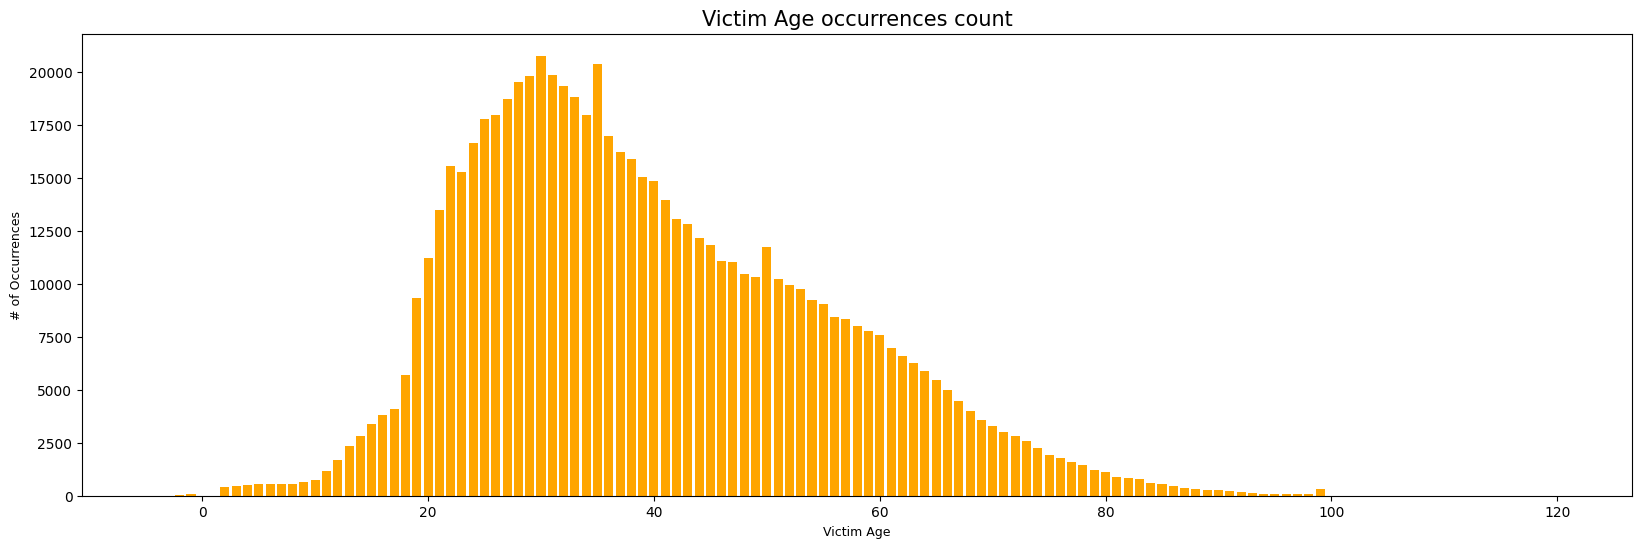

In [11]:
VictAgeOccCount = df_original['victim_age'].value_counts().reset_index() #Victim Age occurrences count
print('Victim Age occurrences count: \n', VictAgeOccCount)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(VictAgeOccCount.iloc[1:,0],VictAgeOccCount.iloc[1:,1], color="orange") # Removed age 0, too many, is it in error?
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Victim Age', fontsize=9)
ax.set_title('Victim Age occurrences count', fontsize=15)

Crime Code Counts: 
      crime_code_1  count
0           510.0  98596
1           624.0  73194
2           354.0  56705
3           330.0  56657
4           310.0  56321
..            ...    ...
136         830.0      5
137         521.0      5
138         430.0      4
139         445.0      2
140         926.0      1

[141 rows x 2 columns]


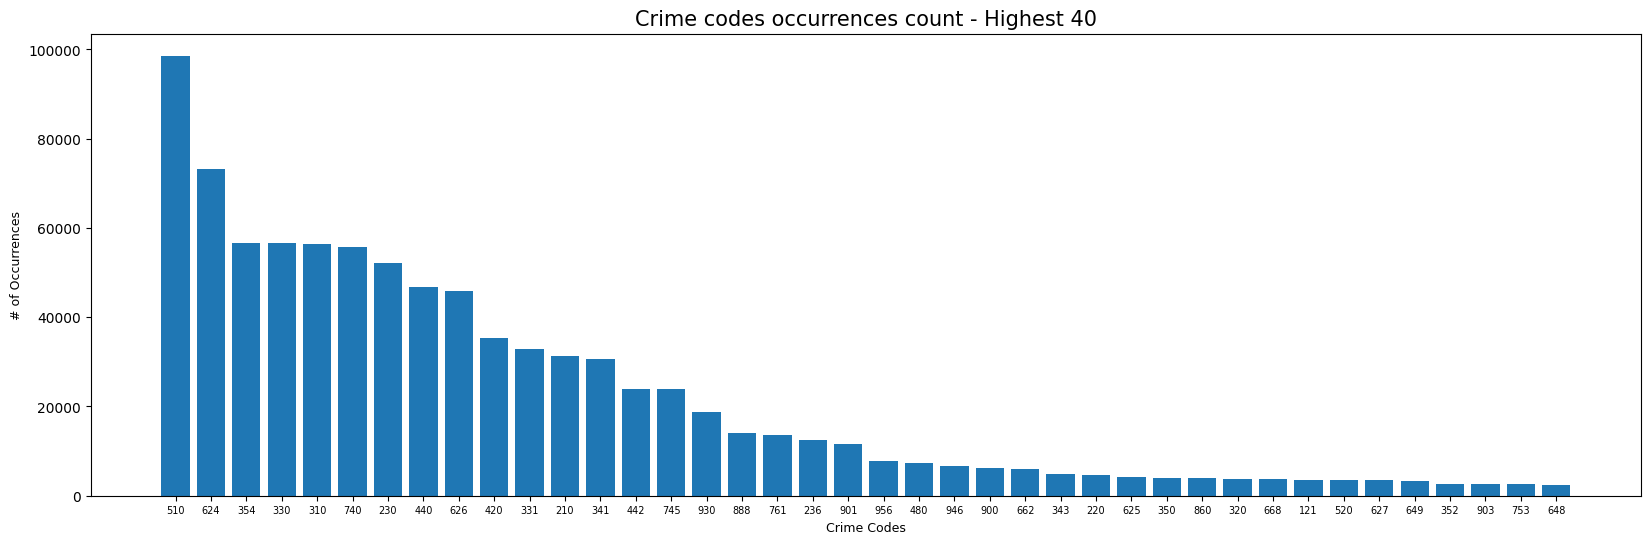

In [12]:
CrmOccCount = df_original['crime_code_1'].value_counts().reset_index() #Crime codes occurrences count
print('Crime Code Counts: \n', CrmOccCount)
CrmOccCount = CrmOccCount.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(CrmOccCount.iloc[:40,0].astype(int).astype(str),CrmOccCount.iloc[:40,1]) # Limited to 10 to allow vizualization
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Crime Codes', fontsize=9)
ax.set_title('Crime codes occurrences count - Highest 40', fontsize=15)
ax.tick_params(axis='x', labelsize=7)

Premise Code used: 
      premise_code   count
0           101.0  232875
1           501.0  154814
2           502.0  112122
3           108.0   63461
4           203.0   43776
..            ...     ...
309         715.0       2
310         746.0       2
311         976.0       2
312         137.0       1
313         975.0       1

[314 rows x 2 columns]


Text(0.5, 1.0, 'Premise Code Occurrences count - Highest 20')

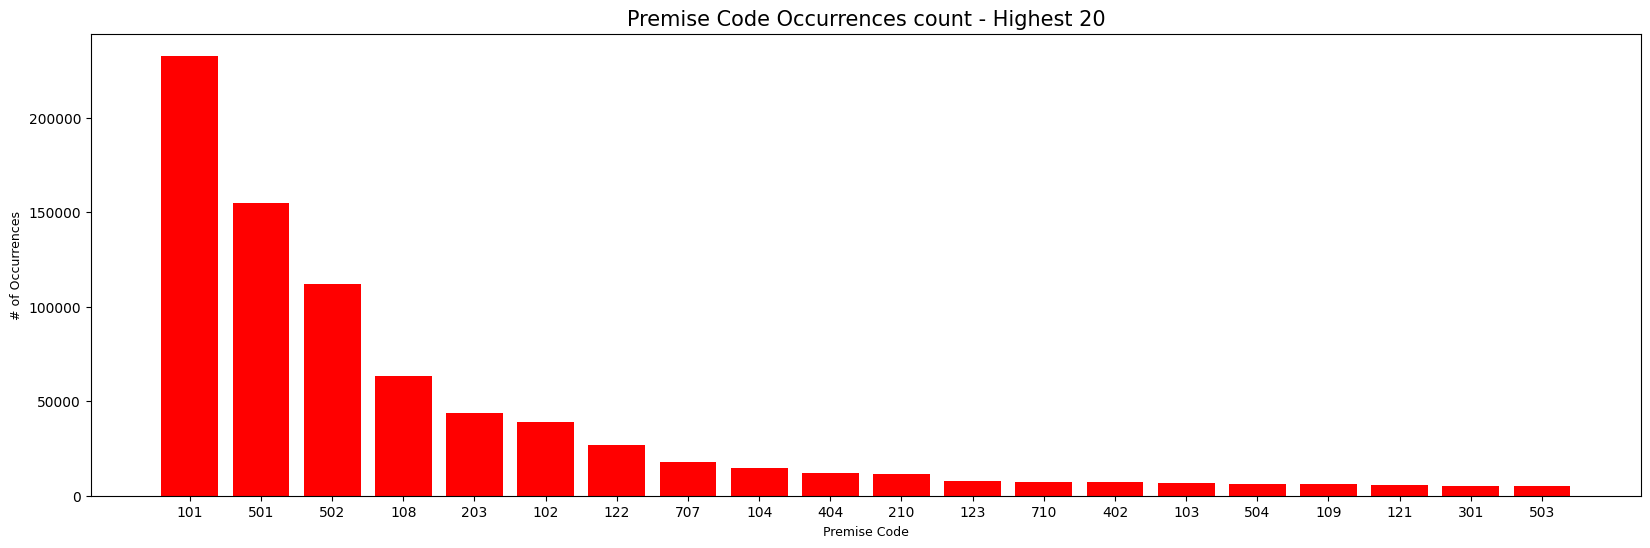

In [13]:
PremisCodeCount = df_original['premise_code'].dropna().value_counts().reset_index() #Premise Code used
print('Premise Code used: \n', PremisCodeCount)
PremisCodeCount = PremisCodeCount.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(PremisCodeCount.iloc[:20,0].astype(int).astype(str),PremisCodeCount.iloc[:20,1], color="red") # Limited to 10 to allow vizualization
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Premise Code', fontsize=9)
ax.set_title('Premise Code Occurrences count - Highest 20', fontsize=15)

Time occurred: 
       time_occ  count
0         1200  32477
1         1800  24319
2         1700  23080
3         2000  22535
4         1900  20989
...        ...    ...
1434      2332     24
1435      2231     24
1436       534     23
1437       559     23
1438       531     14

[1439 rows x 2 columns]


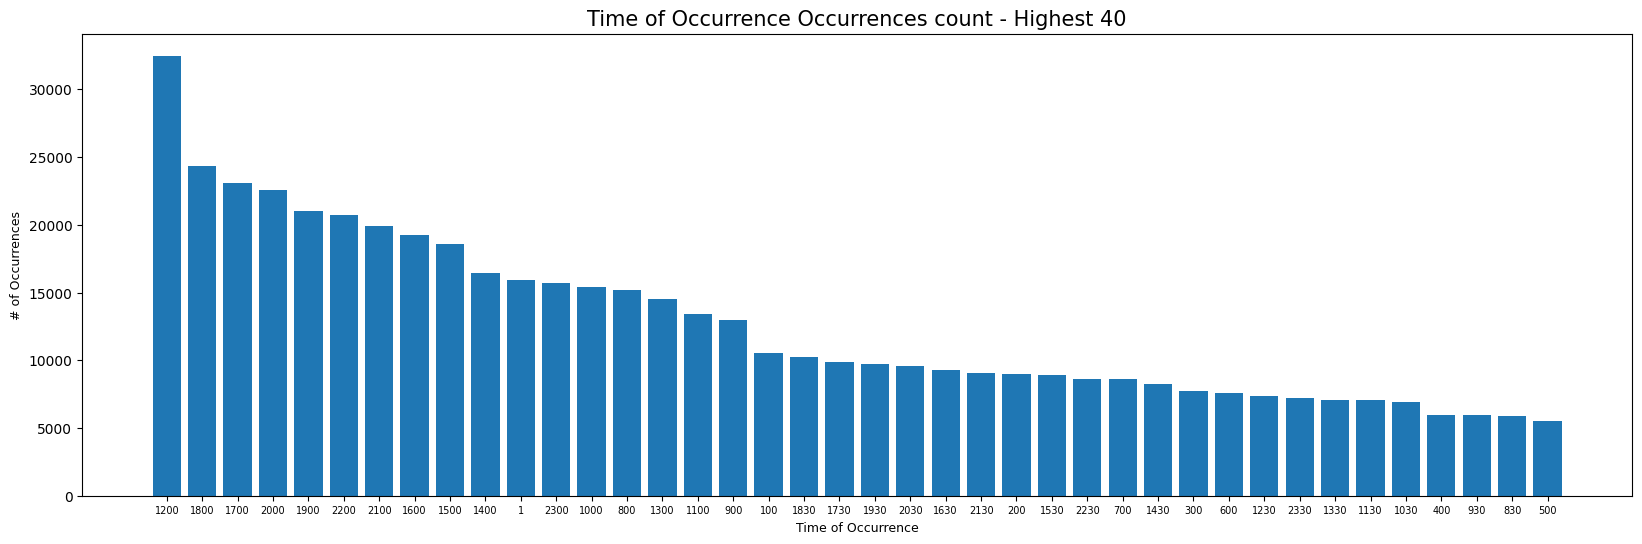

In [14]:
TimeOCC = df_original['time_occ'].dropna().value_counts().reset_index() #Time of Occurrence
print('Time occurred: \n', TimeOCC)
TimeOCC = TimeOCC.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(TimeOCC.iloc[:40,0].astype(str),TimeOCC.iloc[:40,1]) # Limited to 10 to allow vizualization
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Time of Occurrence', fontsize=9)
ax.set_title('Time of Occurrence Occurrences count - Highest 40', fontsize=15)
ax.tick_params(axis='x', labelsize=7)

Area Name: 
       area_name  count
0       Central  62523
1   77th Street  57392
2       Pacific  53582
3     Southwest  51643
4     Hollywood  48357
5       Olympic  46459
6     Southeast  46340
7   N Hollywood  46078
8        Newton  45712
9      Wilshire  44112
10      Rampart  43225
11      West LA  42144
12    Northeast  39463
13     Van Nuys  38824
14  West Valley  38605
15       Harbor  37818
16   Devonshire  37549
17      Topanga  37499
18      Mission  36534
19   Hollenbeck  34203
20     Foothill  30381


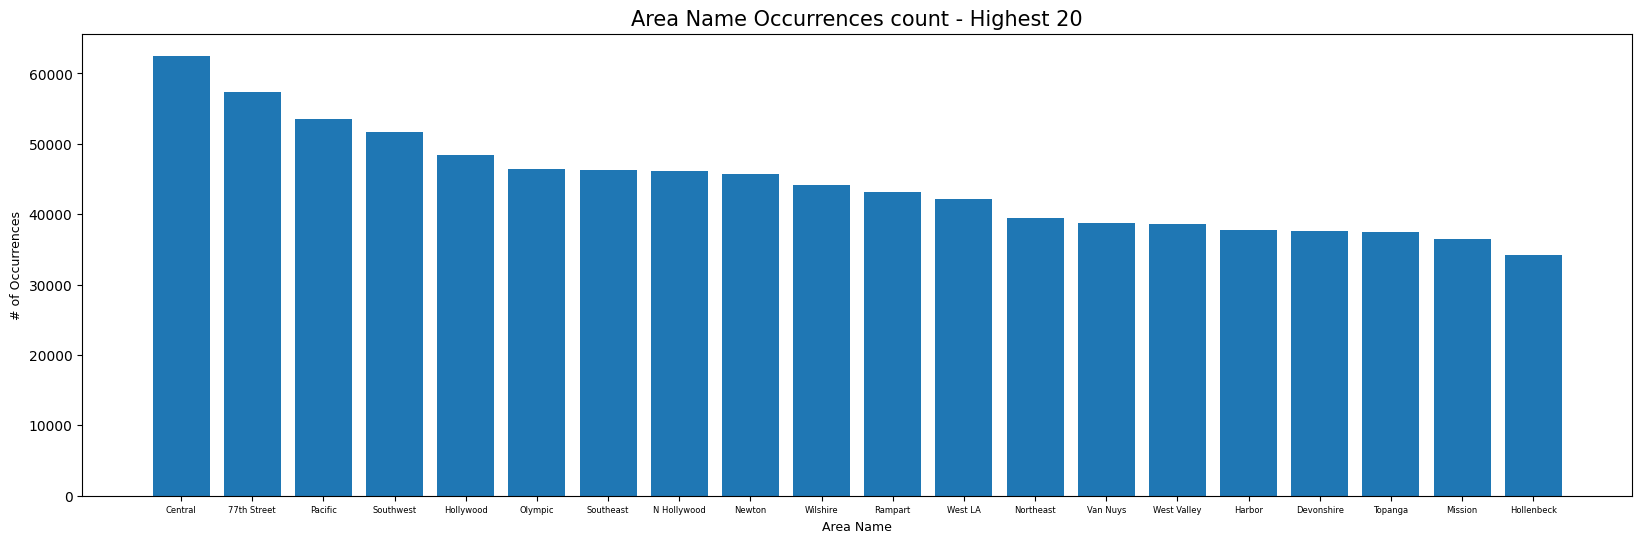

In [15]:
AreaName = df_original['area_name'].dropna().value_counts().reset_index() #Time of Occurrence
print('Area Name: \n', AreaName)
AreaName = AreaName.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(AreaName.iloc[:20,0].astype(str),AreaName.iloc[:20,1]) # Limited to 40 to allow vizualization
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Area Name', fontsize=9)
ax.set_title('Area Name Occurrences count - Highest 20', fontsize=15)
ax.tick_params(axis='x', labelsize=6)

Vict Descent: 
    victim_descent   count
0               H  279400
1               W  185643
2               B  128882
3               X   92849
4               O   72472
5               A   20172
6               K    5027
7               F    3960
8               C    3667
9               J    1290
10              V     975
11              I     872
12              Z     459
13              P     247
14              U     187
15              D      73
16              G      67
17              L      63
18              S      49
19              -       2


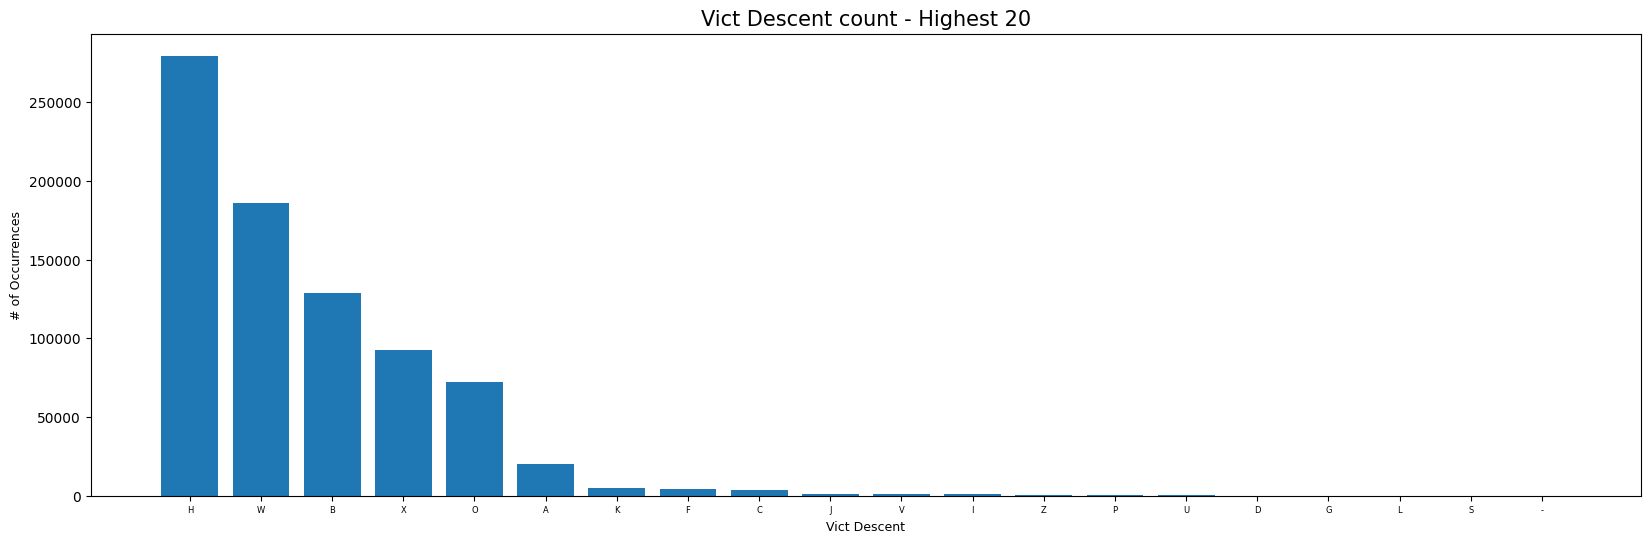

In [16]:
VictDescent = df_original['victim_descent'].dropna().value_counts().reset_index() #Time of Occurrence
print('Vict Descent: \n', VictDescent)
VictDescent = VictDescent.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(VictDescent.iloc[:20,0].astype(str),VictDescent.iloc[:20,1]) # Limited to 10 to allow vizualization
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Vict Descent', fontsize=9)
ax.set_title('Vict Descent count - Highest 20', fontsize=15)
ax.tick_params(axis='x', labelsize=6)

lat_long: 
       lat_long  count
0    4.04LL8.2  52122
1    4.05LL8.2  36789
2    4.06LL8.2  25577
3    4.09LL8.3  20710
4    4.03LL8.2  20161
..         ...    ...
219  4.33LL8.5      3
220   4.2LL8.6      2
221  4.11LL8.5      2
222   3.8LL8.2      1
223  4.29LL8.2      1

[224 rows x 2 columns]


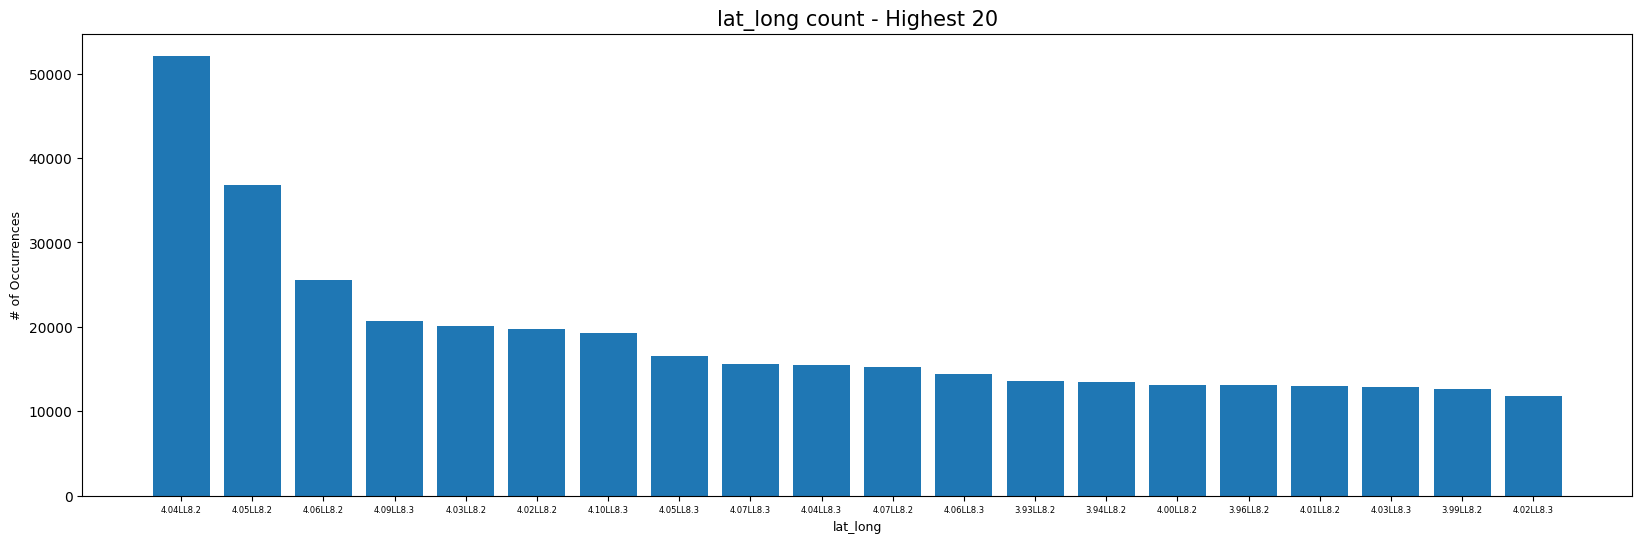

In [17]:
#df_original.drop('Lat_Long', axis=1, inplace=True)
df_original['lat_long'] = df_original['lat'].round(4).astype(str).str[1:5] + 'LL' + df_original['long'].round(4).astype(str).str[3:6] #, CD_df['LON'].round(4).astype(str)
# Join Latitide and Longitude also ignore the third and fourth decimals in order to pinpoint hottest crime locations
lat_long = df_original['lat_long'].dropna().value_counts().reset_index() #Time of Occurrence
print('lat_long: \n', lat_long)
lat_long = lat_long.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(lat_long.iloc[:20,0].astype(str),lat_long.iloc[:20,1]) # Limited to 20 to allow vizualization
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('lat_long', fontsize=9)
ax.set_title('lat_long count - Highest 20', fontsize=15)
ax.tick_params(axis='x', labelsize=6)

# Conclusion from Data Exploration
Since our hypothesis requires to validate, violent crime peaks during the summer, at nights and in lower-income neighborhoods. Where the victims tend to be young victims in public spaces.
We decided to group the following variables:
-Crime Description
-Crime Type
-Crime Weapon
-Zoning areas
-Victim age
-Date of crime
-Time of the day

## Create categories for weapons, crime types, zoning areas, victim age, date crime, and time of the day

In [18]:
# Create a dataframe to focus on crime types
df_crime = df_original[['dr_no','crime_code', 'crime_code_desc','crime_code_1', 'crime_code_2', 'crime_code_3', 'crime_code_4', 'weapon_type', 'weapon_desc']]

# View the dataframe
df_crime

,dr_no,crime_code,crime_code_desc,crime_code_1,crime_code_2,crime_code_3,crime_code_4,weapon_type,weapon_desc
0,190326475,510,VEHICLE - STOLEN,510.0,998.0,NaN,NaN,NaN,NaN
1,200106753,330,BURGLARY FROM VEHICLE,330.0,998.0,NaN,NaN,NaN,NaN
2,200320258,480,BIKE - STOLEN,480.0,NaN,NaN,NaN,NaN,NaN
3,200907217,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),343.0,NaN,NaN,NaN,NaN,NaN
4,220614831,354,THEFT OF IDENTITY,354.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
918438,241605270,888,TRESPASSING,888.0,NaN,NaN,NaN,NaN,NaN
918439,241604405,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN,207.0,OTHER KNIFE
918440,242106032,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),420.0,NaN,NaN,NaN,NaN,NaN
918441,242004546,624,BATTERY - SIMPLE ASSAULT,624.0,NaN,NaN,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"


In [19]:
# Check what values in crime_code_1 are not in crime_code
unique = df_crime[~df_crime['crime_code_1'].isin(df_crime['crime_code'])]['crime_code_1']

# View the values
unique

# Note to team - suggest we simply look at crime code and associated crime_code_desc to start with.  

11679       NaN
25933     521.0
84057       NaN
101090    430.0
161955    521.0
179690    521.0
236758      NaN
350069      NaN
360398    521.0
363743    521.0
431869      NaN
495183      NaN
507830      NaN
693186      NaN
704006      NaN
748696    430.0
757449    430.0
775182    430.0
799648      NaN
871523      NaN
Name: crime_code_1, dtype: float64

In [20]:
# Create an object with the unique crime types, sorted alphabetically
crime_types = np.sort(df_crime['crime_code_desc'].unique())

crime_types

array(['ARSON', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'ATTEMPTED ROBBERY', 'BATTERY - SIMPLE ASSAULT',
       'BATTERY ON A FIREFIGHTER', 'BATTERY POLICE (SIMPLE)',
       'BATTERY WITH SEXUAL CONTACT',
       'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
       'BIGAMY', 'BIKE - ATTEMPTED STOLEN', 'BIKE - STOLEN',
       'BLOCKING DOOR INDUCTION CENTER', 'BOAT - STOLEN', 'BOMB SCARE',
       'BRANDISH WEAPON', 'BRIBERY', 'BUNCO, ATTEMPT',
       'BUNCO, GRAND THEFT', 'BUNCO, PETTY THEFT', 'BURGLARY',
       'BURGLARY FROM VEHICLE', 'BURGLARY FROM VEHICLE, ATTEMPTED',
       'BURGLARY, ATTEMPTED', 'CHILD ABANDONMENT',
       'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'CHILD ANNOYING (17YRS & UNDER)', 'CHILD NEGLECT (SEE 300 W.I.C.)',
       'CHILD PORNOGRAPHY', 'CHILD STEALING', 'CONSPIRACY',
       'CONTEMPT OF COURT', 'CONTRIBUTING', 'CO

In [21]:
# Define categories for each crime type 
crime_category_mapping = {
    'Violent Crimes': [
        'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
        'BATTERY - SIMPLE ASSAULT', 'BATTERY ON A FIREFIGHTER', 'BATTERY POLICE (SIMPLE)', 'BATTERY WITH SEXUAL CONTACT',
        'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 
        'CRIMINAL HOMICIDE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
        'INTIMATE PARTNER - SIMPLE ASSAULT', 'KIDNAPPING', 'KIDNAPPING - GRAND ATTEMPT', 'MANSLAUGHTER, NEGLIGENT',
        'RAPE, ATTEMPTED', 'RAPE, FORCIBLE', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
        'STALKING', 'LYNCHING', 'LYNCHING - ATTEMPTED'
    ],
    
    'Theft/Fraud': [
        'ATTEMPTED ROBBERY', 'BURGLARY', 'BURGLARY FROM VEHICLE', 'BURGLARY FROM VEHICLE, ATTEMPTED', 'BURGLARY, ATTEMPTED',
        'BUNCO, GRAND THEFT', 'BUNCO, PETTY THEFT', 'CREDIT CARDS, FRAUD USE ($950 & UNDER)', 
        'CREDIT CARDS, FRAUD USE ($950.01 & OVER)', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER',
        'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01', 'DISHONEST EMPLOYEE - GRAND THEFT', 
        'DISHONEST EMPLOYEE - PETTY THEFT', 'DISHONEST EMPLOYEE ATTEMPTED THEFT', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)', 
        'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 'EXTORTION', 'GRAND THEFT / AUTO REPAIR', 'GRAND THEFT / INSURANCE FRAUD',
        'PETTY THEFT - AUTO REPAIR', 'PICKPOCKET', 'PICKPOCKET, ATTEMPT', 'PURSE SNATCHING', 'PURSE SNATCHING - ATTEMPT', 
        'SHOPLIFTING - ATTEMPT', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)', 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
        'THEFT FROM MOTOR VEHICLE - ATTEMPT', 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 
        'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 'THEFT FROM PERSON - ATTEMPT', 'THEFT OF IDENTITY', 
        'THEFT PLAIN - ATTEMPT', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT, COIN MACHINE - ATTEMPT', 
        'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)', 'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 'THEFT, PERSON',
        'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'TILL TAP - GRAND THEFT ($950.01 & OVER)', 
        'TILL TAP - PETTY ($950 & UNDER)', 'VEHICLE - ATTEMPT STOLEN', 'VEHICLE - STOLEN', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)',
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 
        'THEFT FROM PERSON - ATTEMPT', 'THEFT FROM MOTOR VEHICLE - ATTEMPT'
    ],
    
    'Sexual Offenses': [
        'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM', 'CHILD PORNOGRAPHY', 'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 
        'LEWD CONDUCT', 'LEWD/LASCIVIOUS ACTS WITH CHILD', 'ORAL COPULATION', 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
        'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'TELEPHONE PROPERTY - DAMAGE'
    ],

    'Drug/Alcohol Crimes': [
        'DRUGS, TO A MINOR', 'DRUNK ROLL'
    ],
    
    'Weapons/Firearms Crimes': [
        'DISCHARGE FIREARMS/SHOTS FIRED', 'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)', 
        'FIREARMS RESTRAINING ORDER (FIREARMS RO)', 'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)', 
        'WEAPONS POSSESSION/BOMBING', 'SHOTS FIRED AT INHABITED DWELLING', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT'
    ],
    
    'Property Crimes': [
        'ARSON', 'BURGLARY', 'BURGLARY FROM VEHICLE', 'BURGLARY FROM VEHICLE, ATTEMPTED', 'BURGLARY, ATTEMPTED', 
        'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
        'ILLEGAL DUMPING'
    ],
    
    'Miscellaneous Crimes': [
        'BIGAMY', 'BIKE - ATTEMPTED STOLEN', 'BIKE - STOLEN', 'BLOCKING DOOR INDUCTION CENTER', 'BOAT - STOLEN', 'BOMB SCARE',
        'BRANDISH WEAPON', 'BRIBERY', 'BUNCO, ATTEMPT', 'BUNCO, GRAND THEFT', 'BUNCO, PETTY THEFT', 'CHILD ABANDONMENT', 
        'CONSPIRACY', 'CONTEMPT OF COURT', 'CONTRIBUTING', 'COUNTERFEIT', 'DOCUMENT FORGERY / STOLEN FELONY', 
        'DOCUMENT WORTHLESS ($200 & UNDER)', 'DOCUMENT WORTHLESS ($200.01 & OVER)', 'DISRUPT SCHOOL', 
        'DISTURBING THE PEACE', 'FALSE IMPRISONMENT', 'FALSE POLICE REPORT', 'FAILURE TO DISPERSE', 'FAILURE TO YIELD', 
        'FALSE POLICE REPORT', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 
        'INCITING A RIOT', 'INDECENT EXPOSURE', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD', 'PANDERING', 'PEEPING TOM',
        'PIMPING', 'PROWLER', 'PURSE SNATCHING - ATTEMPT', 'TRAIN WRECKING', 'TRESPASSING', 'UNAUTHORIZED COMPUTER ACCESS', 
        'VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER', 'VIOLATION OF TEMPORARY RESTRAINING ORDER'
    ],
    
    'Other': [
        'OTHER ASSAULT', 'OTHER MISCELLANEOUS CRIME', 'THREATENING PHONE CALLS/LETTERS', 'THROWING OBJECT AT MOVING VEHICLE'
    ]
}

# Create a categorization function for crimes
def categorize_crime(crime_desc):
    # Handle NaN or None values
    if pd.isna(crime_desc):
        return 'Unknown'
    
    for category, crimes in crime_category_mapping.items():
        for crime in crimes:
            if crime in crime_desc:
                return category
    return 'Other'

# Create new column using the categorization function
df_crime.loc[:, 'crime_category'] = df_crime['crime_code_desc'].apply(categorize_crime)
#df_crime.drop('Crime Category', axis=1, inplace=True)

# View the revised dataframe
df_crime

# Note to group - this may need to be tied back to main dataframe rather than subdataframe

,dr_no,crime_code,crime_code_desc,crime_code_1,crime_code_2,crime_code_3,crime_code_4,weapon_type,weapon_desc,crime_category
0,190326475,510,VEHICLE - STOLEN,510.0,998.0,NaN,NaN,NaN,NaN,Theft/Fraud
1,200106753,330,BURGLARY FROM VEHICLE,330.0,998.0,NaN,NaN,NaN,NaN,Theft/Fraud
2,200320258,480,BIKE - STOLEN,480.0,NaN,NaN,NaN,NaN,NaN,Miscellaneous Crimes
3,200907217,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),343.0,NaN,NaN,NaN,NaN,NaN,Theft/Fraud
4,220614831,354,THEFT OF IDENTITY,354.0,NaN,NaN,NaN,NaN,NaN,Theft/Fraud
...,...,...,...,...,...,...,...,...,...,...
918438,241605270,888,TRESPASSING,888.0,NaN,NaN,NaN,NaN,NaN,Miscellaneous Crimes
918439,241604405,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN,207.0,OTHER KNIFE,Violent Crimes
918440,242106032,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),420.0,NaN,NaN,NaN,NaN,NaN,Theft/Fraud
918441,242004546,624,BATTERY - SIMPLE ASSAULT,624.0,NaN,NaN,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Violent Crimes


Weapon Descr Counts: 
             crime_category   count
0              Theft/Fraud  559763
1           Violent Crimes  222539
2     Miscellaneous Crimes   75684
3                    Other   49346
4  Weapons/Firearms Crimes    4788
5          Sexual Offenses    3705
6          Property Crimes    2576
7      Drug/Alcohol Crimes      42


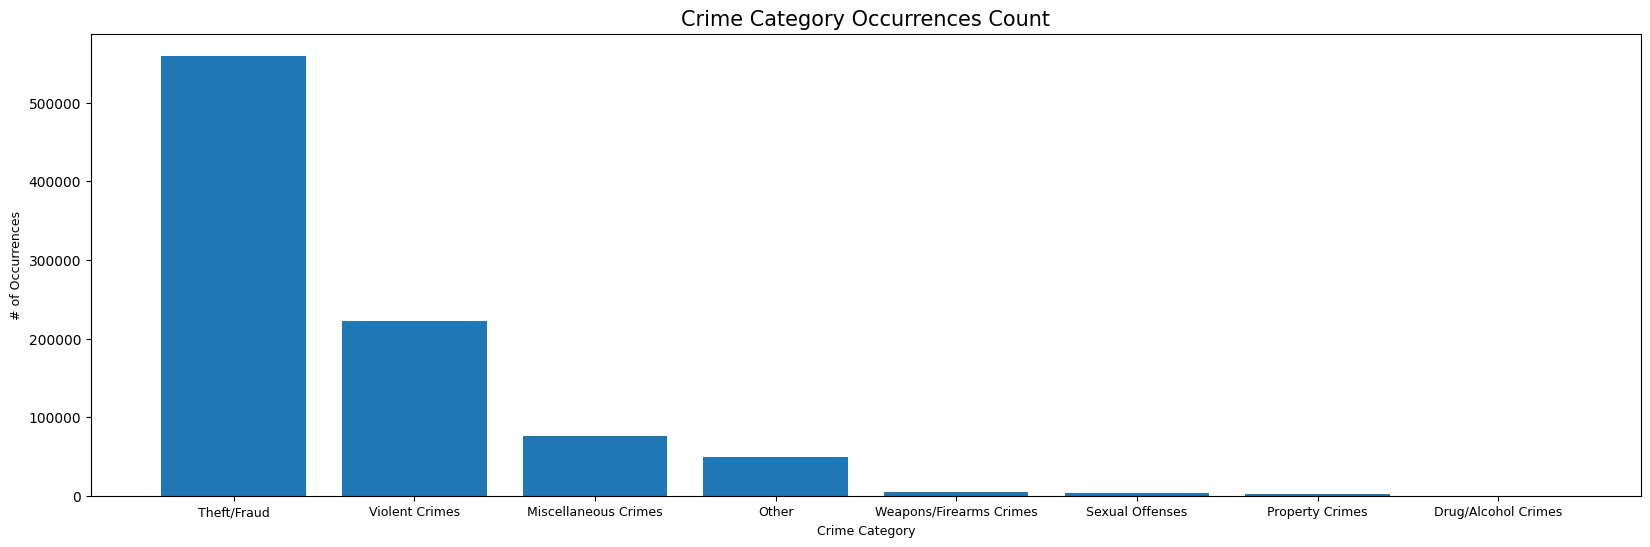

In [22]:
# Added Histogram Crime Type

WeaponDescCount = df_crime['crime_category'].value_counts().reset_index() #Crime codes occurrences count
print('Weapon Descr Counts: \n', WeaponDescCount)
WeaponDescCount = WeaponDescCount.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(WeaponDescCount.iloc[:,0].astype(str),WeaponDescCount.iloc[:,1]) 
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Crime Category', fontsize=9)
ax.set_title('Crime Category Occurrences Count', fontsize=15)
ax.tick_params(axis='x', labelsize=9)


In [23]:
# Create an object with the unique weapon types, sorted alphabetically, NAs removed
weapon_types = np.sort(df_crime['weapon_desc'].dropna().astype(str).unique())

# View the object
weapon_types

array(['AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'ANTIQUE FIREARM',
       'ASSAULT WEAPON/UZI/AK47/ETC', 'AUTOMATIC WEAPON/SUB-MACHINE GUN',
       'AXE', 'BELT FLAILING INSTRUMENT/CHAIN', 'BLACKJACK',
       'BLUNT INSTRUMENT', 'BOARD', 'BOMB THREAT', 'BOTTLE',
       'BOW AND ARROW', 'BOWIE KNIFE', 'BRASS KNUCKLES',
       'CAUSTIC CHEMICAL/POISON', 'CLEAVER', 'CLUB/BAT',
       'CONCRETE BLOCK/BRICK', 'DEMAND NOTE', 'DIRK/DAGGER',
       'DOG/ANIMAL (SIC ANIMAL ON)', 'EXPLOXIVE DEVICE', 'FIRE',
       'FIXED OBJECT', 'FOLDING KNIFE', 'GLASS', 'HAMMER', 'HAND GUN',
       'HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE',
       'HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE', 'ICE PICK',
       'KITCHEN KNIFE', 'KNIFE WITH BLADE 6INCHES OR LESS',
       'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'LIQUOR/DRUGS',
       'M-14 SEMIAUTOMATIC ASSAULT RIFLE',
       'M1-1 SEMIAUTOMATIC ASSAULT RIFLE',
       'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON',
       'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON', 'M

In [24]:
# Define categories for each weapon type
weapon_category_mapping = {
    'Firearm': ['REVOLVER', 'RIFLE', 'SHOTGUN', 'SEMI-AUTOMATIC PISTOL', 'SEMI-AUTOMATIC RIFLE', 
                'HAND GUN', 'M-14 SEMIAUTOMATIC ASSAULT RIFLE', 'MAC-10 SEMIAUTOMATIC ASSAULT WEAPON', 
                'MAC-11 SEMIAUTOMATIC ASSAULT WEAPON', 'UZI SEMIAUTOMATIC ASSAULT RIFLE', 'SIMULATED GUN',
                'OTHER FIREARM', 'STARTER PISTOL/REVOLVER', 'UNKNOWN FIREARM'],
    
    'Knife': ['BOWIE KNIFE', 'FOLDING KNIFE', 'KNIFE WITH BLADE 6INCHES OR LESS', 
              'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH', 'DIRK/DAGGER', 'MACHETE', 'OTHER KNIFE', 'SWITCH BLADE'],
    
    'Blunt Objects': ['AXE', 'BLACKJACK', 'CLUB/BAT', 'HAMMER', 'SCREWDRIVER', 'TIRE IRON', 
                      'ROCK/THROWN OBJECT', 'PIPE/METAL PIPE'],
    
    'Explosives': ['BOMB THREAT', 'EXPLOXIVE DEVICE'],
    
    'Sharp Objects': ['BOW AND ARROW', 'CLEAVER', 'CAUSTIC CHEMICAL/POISON', 'ICE PICK', 
                      'RAZOR', 'RAZOR BLADE', 'SCISSORS', 'BRASS KNUCKLES'],
    
    'Miscellaneous': ['BELT FLAILING INSTRUMENT/CHAIN', 'BOARD', 'DEMAND NOTE', 'FIXED OBJECT', 'GLASS', 'LIQUOR/DRUGS', 
                      'PHYSICAL PRESENCE', 'ROPE/LIGATURE', 'SCALDING LIQUID', 'MACE/PEPPER SPRAY', 'MARTIAL ARTS WEAPONS', 
                      'RELIC FIREARM', 'SWORD', 'SYRINGE', 'UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE', 
                      'UNKNOWN TYPE CUTTING INSTRUMENT', 'UNKNOWN WEAPON/OTHER WEAPON', 
                      'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'TOY GUN', 'VERBAL THREAT', 'VEHICLE']
}

# Create a categorization function
def categorize_weapon(weapon_desc):
    # Handle NaN or None values
    if pd.isna(weapon_desc): 
        return 'Unknown'    
    for category, weapons in weapon_category_mapping.items():
        for weapon in weapons:
            if weapon in weapon_desc:
                return category
    return 'Other'

# Create new column using the categorization function
df_crime.loc[:, 'weapon_category'] = df_crime['weapon_desc'].apply(categorize_weapon)

# View the revised dataframe
df_crime

# Note to group - this may need to be tied back to main dataframe rather than subdataframe

,dr_no,crime_code,crime_code_desc,crime_code_1,crime_code_2,crime_code_3,crime_code_4,weapon_type,weapon_desc,crime_category,weapon_category
0,190326475,510,VEHICLE - STOLEN,510.0,998.0,NaN,NaN,NaN,NaN,Theft/Fraud,Unknown
1,200106753,330,BURGLARY FROM VEHICLE,330.0,998.0,NaN,NaN,NaN,NaN,Theft/Fraud,Unknown
2,200320258,480,BIKE - STOLEN,480.0,NaN,NaN,NaN,NaN,NaN,Miscellaneous Crimes,Unknown
3,200907217,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),343.0,NaN,NaN,NaN,NaN,NaN,Theft/Fraud,Unknown
4,220614831,354,THEFT OF IDENTITY,354.0,NaN,NaN,NaN,NaN,NaN,Theft/Fraud,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,888,TRESPASSING,888.0,NaN,NaN,NaN,NaN,NaN,Miscellaneous Crimes,Unknown
918439,241604405,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",230.0,NaN,NaN,NaN,207.0,OTHER KNIFE,Violent Crimes,Knife
918440,242106032,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),420.0,NaN,NaN,NaN,NaN,NaN,Theft/Fraud,Unknown
918441,242004546,624,BATTERY - SIMPLE ASSAULT,624.0,NaN,NaN,NaN,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Violent Crimes,Miscellaneous


Weapon Descr Counts: 
   weapon_category   count
0         Unknown  600943
1   Miscellaneous  238538
2         Firearm   39269
3           Knife   17752
4           Other   10589
5   Blunt Objects    9679
6   Sharp Objects    1401
7      Explosives     272


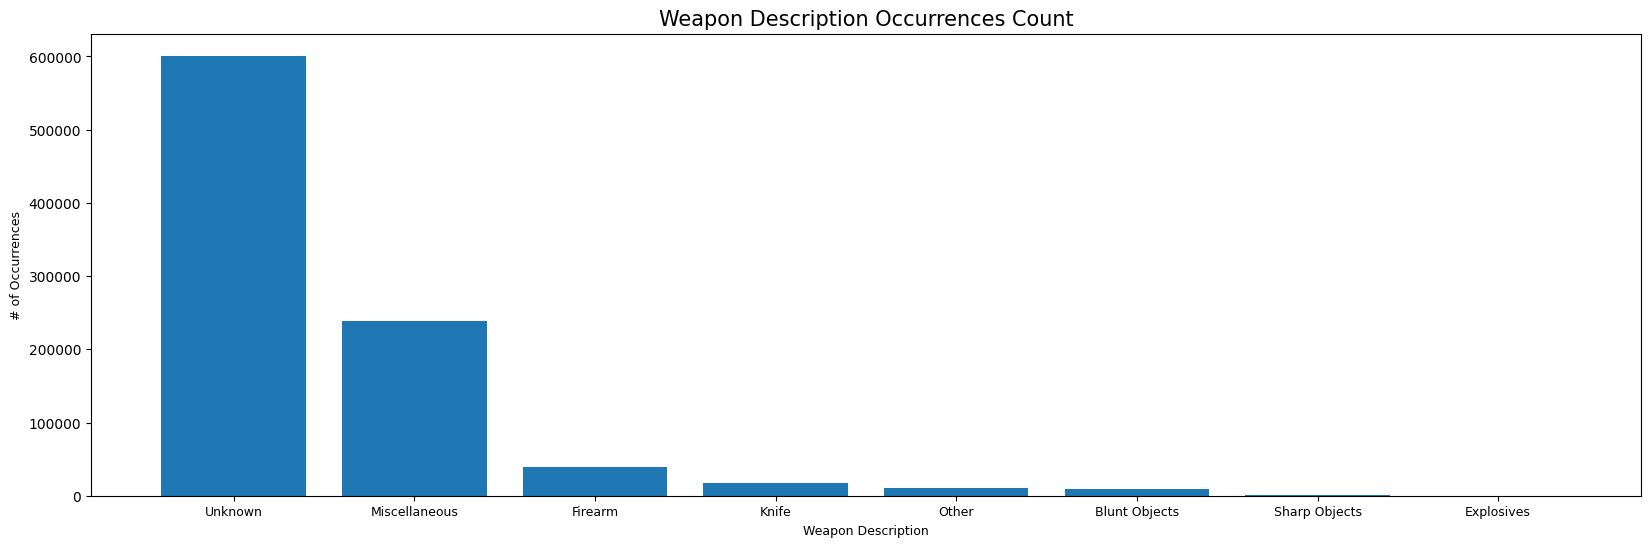

In [25]:
# Histogram

WeaponDescCount = df_crime['weapon_category'].value_counts().reset_index() #Crime codes occurrences count
print('Weapon Descr Counts: \n', WeaponDescCount)
WeaponDescCount = WeaponDescCount.sort_values(by='count', ascending=False)
f, ax = plt.subplots(1, 1, figsize=(20, 6))
habars0 = ax.bar(WeaponDescCount.iloc[:,0].astype(str),WeaponDescCount.iloc[:,1]) 
ax.set_ylabel('# of Occurrences', fontsize=9)
ax.set_xlabel('Weapon Description', fontsize=9)
ax.set_title('Weapon Description Occurrences Count', fontsize=15)
ax.tick_params(axis='x', labelsize=9)

In [26]:
#Create a category for Time OCC
# Example: Converting integer 'time_occ' to time format and extracting the hour
def convert_to_time(hour_min):
    # Convert integer to a string and pad it to 4 digits (e.g., 830 -> 0830, 120 -> 0120)
    time_str = str(hour_min).zfill(4)
    
    # Convert to 'HH:MM' format and extract the hour part
    hour = int(time_str[:2])
    return hour

# Convert the integer column to hour and categorize
df_original['hour_occ'] = df_original['time_occ'].apply(convert_to_time)

# Function to categorize the time of day
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to categorize and create a new column 'time_of_the_day'
df_original['time_of_the_day'] = df_original['hour_occ'].apply(categorize_time_of_day)

# Optional: Drop the intermediate hour column
df_original.drop('hour_occ', axis=1, inplace=True)
df_original.head()

,dr_no,date_rptd,date_occ,time_occ,area_code,area_name,sub_area_code,part_1_2,crime_code,crime_code_desc,...,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,lat,long,lat_long,time_of_the_day
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,4.03LL8.3,Night
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,4.04LL8.2,Evening
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,4.02LL8.3,Evening
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,4.15LL8.4,Evening
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,4.09LL8.3,Afternoon


In [27]:
#Creating a category for date OCC
df_original['date_occ'] = pd.to_datetime(df_original['date_occ'], errors='coerce')

# Function to determine the season based on the month
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:  # Winter: Dec, Jan, Feb
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: Mar, Apr, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: Jun, Jul, Aug
        return 'Summer'
    elif month in [9, 10, 11]:  # Fall: Sep, Oct, Nov
        return 'Fall'
    else:
        return 'Unknown'

# Apply the function to create a new 'Season' column
df_original['season'] = df_original['date_occ'].apply(get_season)

# Display the first few rows to confirm
print(df_original[['date_occ', 'season']].head())


    date_occ  season
0 2020-03-01  Spring
1 2020-02-08  Winter
2 2020-11-04    Fall
3 2020-03-10  Spring
4 2020-08-17  Summer


In [28]:
# Function to categorize age into predefined age groups
def categorize_age(age):
    if age < 13:
        return '<13'
    elif 13 <= age <= 17:
        return '13 - 17'
    elif 18 <= age <= 30:
        return '18 - 30'
    elif 31 <= age <= 65:
        return '30 - 65'
    else:
        return '>65'

# Applying the function to the 'victim_age' column and creating a new column 'victim_age_range'
df_original['victim_age_range'] = df_original['victim_age'].apply(categorize_age)
df_original.head()

,dr_no,date_rptd,date_occ,time_occ,area_code,area_name,sub_area_code,part_1_2,crime_code,crime_code_desc,...,crime_code_3,crime_code_4,location,cross_street,lat,long,lat_long,time_of_the_day,season,victim_age_range
0,190326475,03/01/2020 12:00:00 AM,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,4.03LL8.3,Night,Spring,<13
1,200106753,02/09/2020 12:00:00 AM,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,4.04LL8.2,Evening,Winter,30 - 65
2,200320258,11/11/2020 12:00:00 AM,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,4.02LL8.3,Evening,Fall,18 - 30
3,200907217,05/10/2023 12:00:00 AM,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,4.15LL8.4,Evening,Spring,18 - 30
4,220614831,08/18/2022 12:00:00 AM,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,4.09LL8.3,Afternoon,Summer,18 - 30


In [29]:
# Define a mapping dictionary for area categories based on your list of areas
area_mapping = {
    'Central': 'Urban',
    '77th Street': 'Urban',
    'Pacific': 'Urban',
    'Southwest': 'Urban',
    'Hollywood': 'Urban',
    'Olympic': 'Urban',
    'Southeast': 'Urban',
    'N Hollywood': 'Semi-Urban',
    'Newton': 'Urban',
    'Wilshire': 'Semi-Urban',
    'Rampart': 'Urban',
    'West LA': 'Urban',
    'Northeast': 'Semi-Urban',
    'Van Nuys': 'Semi-Urban',
    'West Valley': 'Suburban',
    'Harbor': 'Suburban',
    'Devonshire': 'Suburban',
    'Topanga': 'Suburban',
    'Mission': 'Urban',
    'Hollenbeck': 'Urban',
    'Foothill': 'Suburban',
}

# Create a new column 'area_category' based on the mapping
df_original['area_category'] = df_original['area_name'].map(area_mapping).fillna('Other')

# Check the distribution of the new categories
print(df_original['area_category'].value_counts())

area_category
Urban         568114
Suburban      181852
Semi-Urban    168477
Name: count, dtype: int64


In [30]:
# Convert 'date_occ' and 'date_rptd' to datetime format
df_original['date_occ'] = pd.to_datetime(df_original['date_occ'])
df_original['date_rptd'] = pd.to_datetime(df_original['date_rptd'])

df_original['days_elapsed'] = (df_original['date_rptd'] - df_original['date_occ']).dt.days

# Display the result
print(df_original[['date_occ', 'date_rptd', 'days_elapsed']].head())

    date_occ  date_rptd  days_elapsed
0 2020-03-01 2020-03-01             0
1 2020-02-08 2020-02-09             1
2 2020-11-04 2020-11-11             7
3 2020-03-10 2023-05-10          1156
4 2020-08-17 2022-08-18           731


# Cleaning Data Frame for Exploratory Data Analysis

In [31]:
#Cleaned DF
df_cat=pd.merge(left=df_original, right=df_crime,how='left')
df_cat

,dr_no,date_rptd,date_occ,time_occ,area_code,area_name,sub_area_code,part_1_2,crime_code,crime_code_desc,...,lat,long,lat_long,time_of_the_day,season,victim_age_range,area_category,days_elapsed,crime_category,weapon_category
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,4.03LL8.3,Night,Spring,<13,Semi-Urban,0,Theft/Fraud,Unknown
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,34.0444,-118.2628,4.04LL8.2,Evening,Winter,30 - 65,Urban,1,Theft/Fraud,Unknown
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,4.02LL8.3,Evening,Fall,18 - 30,Urban,7,Miscellaneous Crimes,Unknown
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,4.15LL8.4,Evening,Spring,18 - 30,Semi-Urban,1156,Theft/Fraud,Unknown
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,4.09LL8.3,Afternoon,Summer,18 - 30,Urban,731,Theft/Fraud,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,2024-02-11,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,34.2278,-118.4051,4.22LL8.4,Evening,Winter,>65,Suburban,0,Miscellaneous Crimes,Unknown
918439,241604405,2024-01-14,2024-01-13,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,34.2271,-118.3878,4.22LL8.3,Morning,Winter,30 - 65,Suburban,1,Violent Crimes,Knife
918440,242106032,2024-02-20,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,34.2260,-118.6214,4.22LL8.6,Night,Winter,30 - 65,Suburban,3,Theft/Fraud,Unknown
918441,242004546,2024-01-16,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,34.0690,-118.3054,4.06LL8.3,Afternoon,Winter,>65,Urban,0,Violent Crimes,Miscellaneous


In [32]:
#Determining how to tackle null values in the new data frame 
df_cat.isnull().sum()/len(df_cat)*100

dr_no                0.000000
date_rptd            0.000000
date_occ             0.000000
time_occ             0.000000
area_code            0.000000
area_name            0.000000
sub_area_code        0.000000
part_1_2             0.000000
crime_code           0.000000
crime_code_desc      0.000000
mo_codes            13.968423
victim_age           0.000000
victim_sex          13.291843
victim_descent      13.292823
premise_code         0.001089
premise_desc         0.060646
weapon_type         65.430626
weapon_desc         65.430626
status               0.000000
status_desc          0.000000
crime_code_1         0.001198
crime_code_2        92.728563
crime_code_3        99.754911
crime_code_4        99.992923
location             0.000000
cross_street        84.286014
lat                  0.000000
long                 0.000000
lat_long             0.000000
time_of_the_day      0.000000
season               0.000000
victim_age_range     0.000000
area_category        0.000000
days_elaps

# Null Criteria
Rows removed= 'Crime_cod_1'

Columns removed since these aren't relevant for analysis proposes = "crime_code_2","crime_code_3","crime_code_4","mo_codes","cross_street",'premise_code','premise_desc'

Null values re-categorized to "Unknown"= 'victim_sex','victim_descent','weapon_type','weapon_desc'ved


In [33]:
df_cat = df_cat.dropna(subset=['crime_code_1'])
df_cat

,dr_no,date_rptd,date_occ,time_occ,area_code,area_name,sub_area_code,part_1_2,crime_code,crime_code_desc,...,lat,long,lat_long,time_of_the_day,season,victim_age_range,area_category,days_elapsed,crime_category,weapon_category
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,4.03LL8.3,Night,Spring,<13,Semi-Urban,0,Theft/Fraud,Unknown
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,34.0444,-118.2628,4.04LL8.2,Evening,Winter,30 - 65,Urban,1,Theft/Fraud,Unknown
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,4.02LL8.3,Evening,Fall,18 - 30,Urban,7,Miscellaneous Crimes,Unknown
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,4.15LL8.4,Evening,Spring,18 - 30,Semi-Urban,1156,Theft/Fraud,Unknown
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,4.09LL8.3,Afternoon,Summer,18 - 30,Urban,731,Theft/Fraud,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,2024-02-11,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,34.2278,-118.4051,4.22LL8.4,Evening,Winter,>65,Suburban,0,Miscellaneous Crimes,Unknown
918439,241604405,2024-01-14,2024-01-13,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,34.2271,-118.3878,4.22LL8.3,Morning,Winter,30 - 65,Suburban,1,Violent Crimes,Knife
918440,242106032,2024-02-20,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,34.2260,-118.6214,4.22LL8.6,Night,Winter,30 - 65,Suburban,3,Theft/Fraud,Unknown
918441,242004546,2024-01-16,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,34.0690,-118.3054,4.06LL8.3,Afternoon,Winter,>65,Urban,0,Violent Crimes,Miscellaneous


In [34]:
fill_values = {
    'victim_sex': "Unknown",  
    'victim_descent': "Unknown"  }
df_cat = df_cat.fillna(value=fill_values)
df_cat

,dr_no,date_rptd,date_occ,time_occ,area_code,area_name,sub_area_code,part_1_2,crime_code,crime_code_desc,...,lat,long,lat_long,time_of_the_day,season,victim_age_range,area_category,days_elapsed,crime_category,weapon_category
0,190326475,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,34.0375,-118.3506,4.03LL8.3,Night,Spring,<13,Semi-Urban,0,Theft/Fraud,Unknown
1,200106753,2020-02-09,2020-02-08,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,34.0444,-118.2628,4.04LL8.2,Evening,Winter,30 - 65,Urban,1,Theft/Fraud,Unknown
2,200320258,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,34.0210,-118.3002,4.02LL8.3,Evening,Fall,18 - 30,Urban,7,Miscellaneous Crimes,Unknown
3,200907217,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,34.1576,-118.4387,4.15LL8.4,Evening,Spring,18 - 30,Semi-Urban,1156,Theft/Fraud,Unknown
4,220614831,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,34.0944,-118.3277,4.09LL8.3,Afternoon,Summer,18 - 30,Urban,731,Theft/Fraud,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,2024-02-11,2024-02-11,1920,16,Foothill,1681,2,888,TRESPASSING,...,34.2278,-118.4051,4.22LL8.4,Evening,Winter,>65,Suburban,0,Miscellaneous Crimes,Unknown
918439,241604405,2024-01-14,2024-01-13,720,16,Foothill,1673,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,34.2271,-118.3878,4.22LL8.3,Morning,Winter,30 - 65,Suburban,1,Violent Crimes,Knife
918440,242106032,2024-02-20,2024-02-17,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,34.2260,-118.6214,4.22LL8.6,Night,Winter,30 - 65,Suburban,3,Theft/Fraud,Unknown
918441,242004546,2024-01-16,2024-01-16,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,34.0690,-118.3054,4.06LL8.3,Afternoon,Winter,>65,Urban,0,Violent Crimes,Miscellaneous


In [35]:
#Validating null approach is in the new DF
df_cat.isnull().sum()/len(df_cat)*100

dr_no                0.000000
date_rptd            0.000000
date_occ             0.000000
time_occ             0.000000
area_code            0.000000
area_name            0.000000
sub_area_code        0.000000
part_1_2             0.000000
crime_code           0.000000
crime_code_desc      0.000000
mo_codes            13.968590
victim_age           0.000000
victim_sex           0.000000
victim_descent       0.000000
premise_code         0.001089
premise_desc         0.060647
weapon_type         65.430538
weapon_desc         65.430538
status               0.000000
status_desc          0.000000
crime_code_1         0.000000
crime_code_2        92.729674
crime_code_3        99.754908
crime_code_4        99.992923
location             0.000000
cross_street        84.286262
lat                  0.000000
long                 0.000000
lat_long             0.000000
time_of_the_day      0.000000
season               0.000000
victim_age_range     0.000000
area_category        0.000000
days_elaps

In [36]:
columns=['dr_no','date_rptd','date_occ','area_name','crime_code_desc','victim_age','victim_sex','victim_descent','premise_code','premise_desc','status','status_desc','crime_code_1','location','time_of_the_day','season','victim_age_range','area_category','days_elapsed','crime_category','weapon_category']
df_crimef= df_cat[columns]
df_crimef

,dr_no,date_rptd,date_occ,area_name,crime_code_desc,victim_age,victim_sex,victim_descent,premise_code,premise_desc,...,status_desc,crime_code_1,location,time_of_the_day,season,victim_age_range,area_category,days_elapsed,crime_category,weapon_category
0,190326475,2020-03-01,2020-03-01,Wilshire,VEHICLE - STOLEN,0,M,O,101.0,STREET,...,Adult Arrest,510.0,1900 S LONGWOOD AV,Night,Spring,<13,Semi-Urban,0,Theft/Fraud,Unknown
1,200106753,2020-02-09,2020-02-08,Central,BURGLARY FROM VEHICLE,47,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),...,Invest Cont,330.0,1000 S FLOWER ST,Evening,Winter,30 - 65,Urban,1,Theft/Fraud,Unknown
2,200320258,2020-11-11,2020-11-04,Southwest,BIKE - STOLEN,19,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,Invest Cont,480.0,1400 W 37TH ST,Evening,Fall,18 - 30,Urban,7,Miscellaneous Crimes,Unknown
3,200907217,2023-05-10,2020-03-10,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,405.0,CLOTHING STORE,...,Invest Cont,343.0,14000 RIVERSIDE DR,Evening,Spring,18 - 30,Semi-Urban,1156,Theft/Fraud,Unknown
4,220614831,2022-08-18,2020-08-17,Hollywood,THEFT OF IDENTITY,28,M,H,102.0,SIDEWALK,...,Invest Cont,354.0,1900 TRANSIENT,Afternoon,Summer,18 - 30,Urban,731,Theft/Fraud,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918438,241605270,2024-02-11,2024-02-11,Foothill,TRESPASSING,79,M,O,501.0,SINGLE FAMILY DWELLING,...,Adult Arrest,888.0,8700 SHARP AV,Evening,Winter,>65,Suburban,0,Miscellaneous Crimes,Unknown
918439,241604405,2024-01-14,2024-01-13,Foothill,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36,M,H,101.0,STREET,...,Invest Cont,230.0,8700 LANKERSHIM BL,Morning,Winter,30 - 65,Suburban,1,Violent Crimes,Knife
918440,242106032,2024-02-20,2024-02-17,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44,F,O,104.0,DRIVEWAY,...,Invest Cont,420.0,22700 NAPA ST,Night,Winter,30 - 65,Suburban,3,Theft/Fraud,Unknown
918441,242004546,2024-01-16,2024-01-16,Olympic,BATTERY - SIMPLE ASSAULT,80,F,O,124.0,BUS STOP,...,Invest Cont,624.0,HOBART BL,Afternoon,Winter,>65,Urban,0,Violent Crimes,Miscellaneous


# Data Analysis

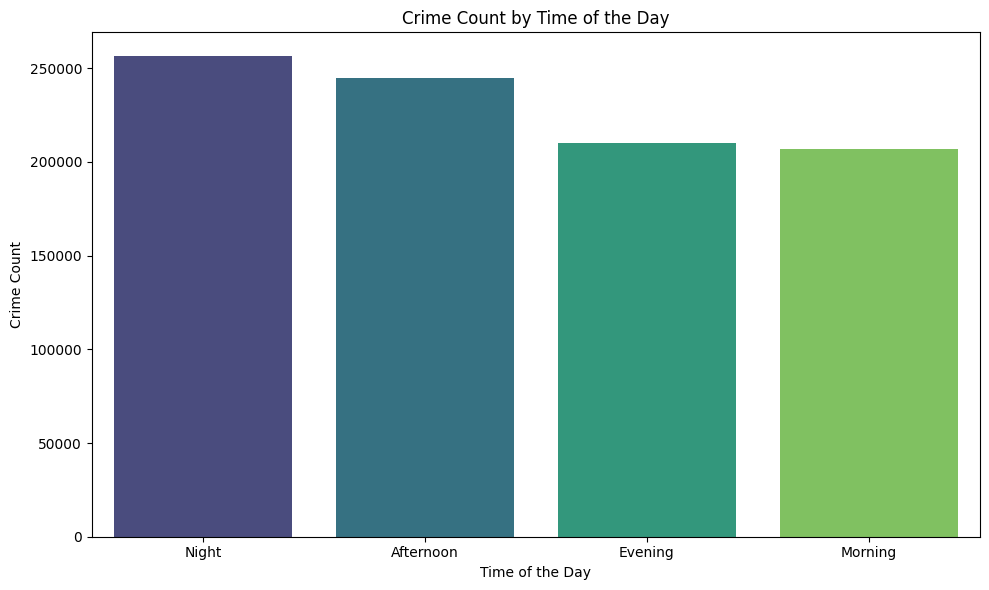

In [37]:
# Group the data by 'time_of_the_day' and count occurrences
crime_count_by_time = df_crimef['time_of_the_day'].value_counts().reset_index(name='count')

# Rename columns for clarity
crime_count_by_time.columns = ['time_of_the_day', 'count']

# Plotting the crime count with respect to 'time_of_the_day'
plt.figure(figsize=(10, 6))
sns.barplot(x='time_of_the_day', y='count', data=crime_count_by_time, palette='viridis')

# Customize the plot
plt.title('Crime Count by Time of the Day')
plt.xlabel('Time of the Day')
plt.ylabel('Crime Count')
plt.tight_layout()

# Show the plot
plt.show()

**CRIME COUNT BY SEASON**

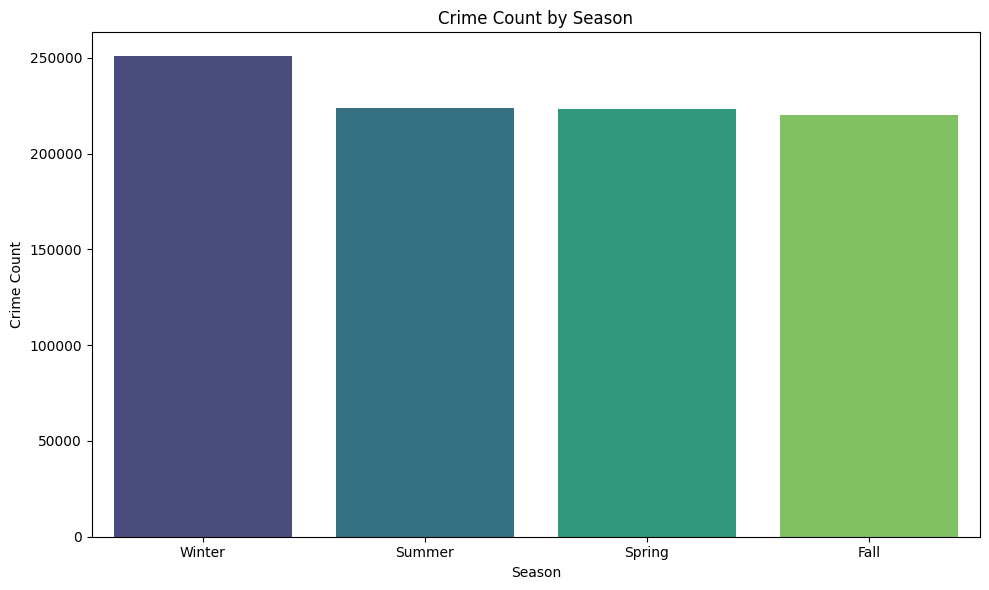

In [38]:
# Group the data by 'time_of_the_day' and count occurrences
crime_count_by_time = df_crimef['season'].value_counts().reset_index(name='count')

# Rename columns for clarity
crime_count_by_time.columns = ['season', 'count']

# Plotting the crime count with respect to 'time_of_the_day'
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=crime_count_by_time, palette='viridis')

# Customize the plot
plt.title('Crime Count by Season')
plt.xlabel('Season')
plt.ylabel('Crime Count')
plt.tight_layout()

# Show the plot
plt.show()

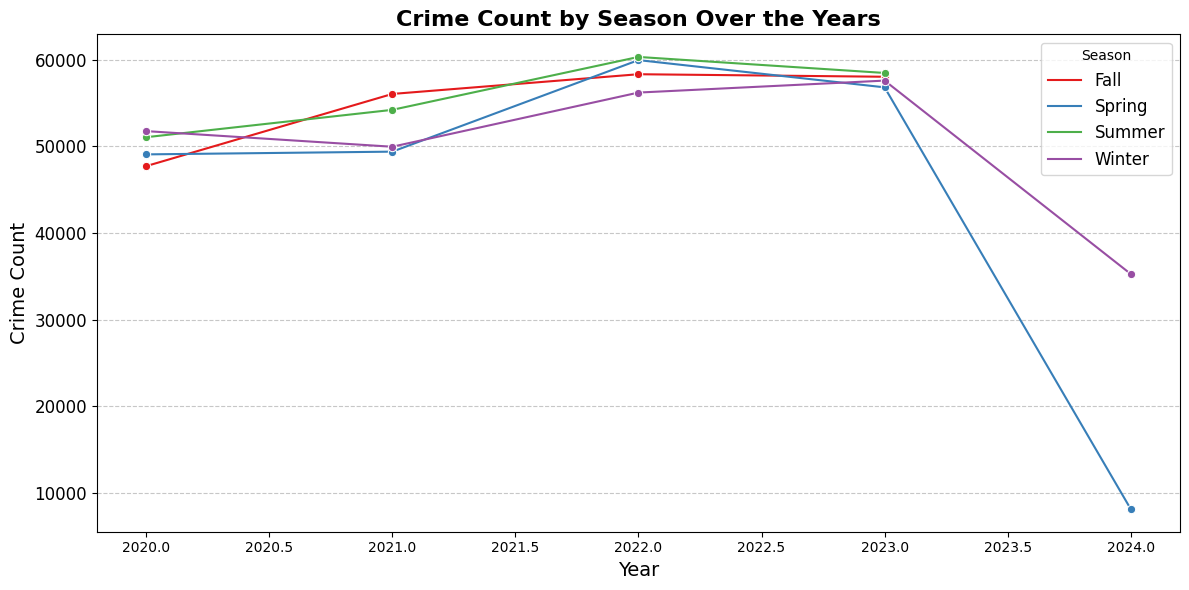

In [39]:
# Ensure 'date_occ' is in datetime format
df_crimef['date_occ'] = pd.to_datetime(df_crimef['date_occ'])

# Extract the year from 'date_occ' and create a new column 'year'
df_crimef['year'] = df_crimef['date_occ'].dt.year

# Plot the data using Seaborn
plt.figure(figsize=(12, 6))

# Group by 'year' and 'Season' and count occurrences
season_year_crime_count = df_crimef.groupby(['year', 'season']).size().reset_index(name='crime_count')

# Create a bar plot or line plot for crime count by season over the years
sns.lineplot(x='year', y='crime_count', hue='season', data=season_year_crime_count, marker='o', palette='Set1')

# Customize the plot
plt.title('Crime Count by Season Over the Years', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)
plt.yticks(fontsize=12)
plt.legend(title='Season', fontsize=12)

# Add gridlines for better readability
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust the layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

**MOST FREQUENT CRIME TYPES BY AREA**

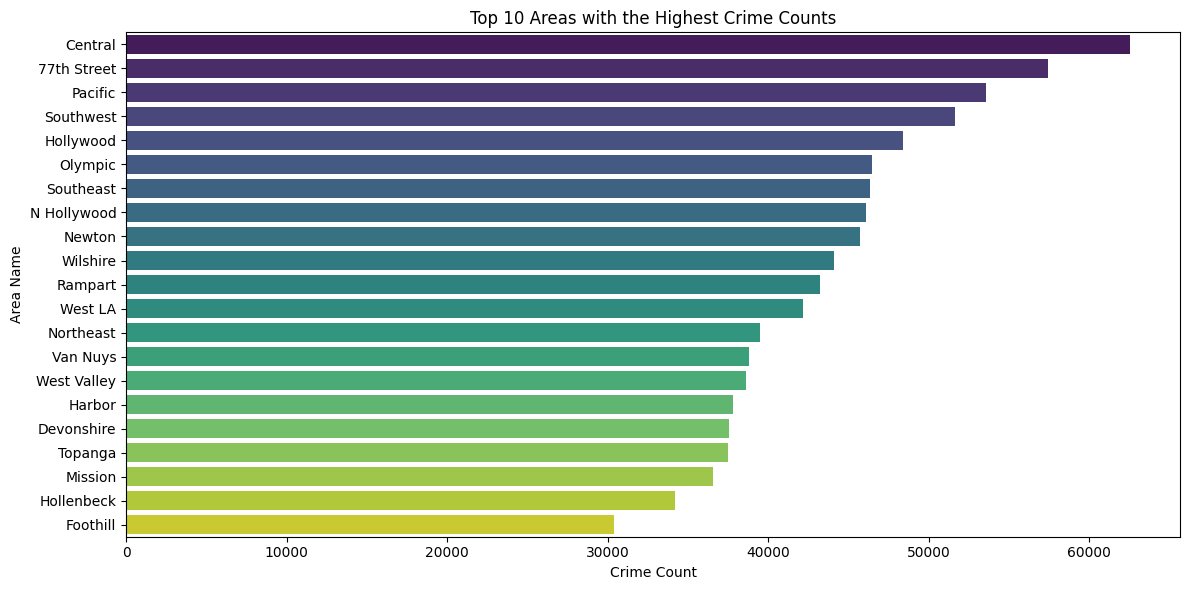

In [40]:
# Group by 'area_name' and count the number of crimes in each area
area_crime_counts = df_crimef['area_name'].value_counts().reset_index(name='crime_count')
area_crime_counts.columns = ['area_name', 'crime_count']

# Sort the data by crime count in descending order to show the top areas
top_area_crimes = area_crime_counts.sort_values(by='crime_count', ascending=False)

# Plot the top 10 areas with the highest crime counts
plt.figure(figsize=(12, 6))
sns.barplot(x='crime_count', y='area_name', data=top_area_crimes, palette='viridis')

# Customize the plot
plt.title('Top 10 Areas with the Highest Crime Counts')
plt.xlabel('Crime Count')
plt.ylabel('Area Name')
plt.tight_layout()

# Show the plot
plt.show()

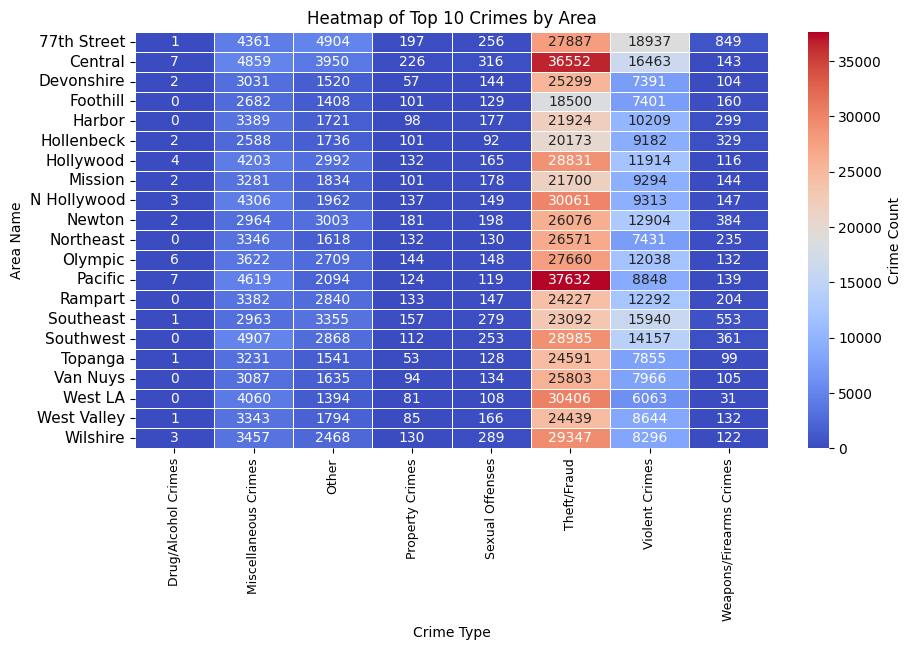

In [41]:
# Group by 'crime_code_desc' to find the total count of each crime type
top_crimes = df_crimef.groupby('crime_category').size().nlargest(10).index

# Filter the dataframe to only include rows with top 10 crimes
df_top_crimes = df_crimef[df_crimef['crime_category'].isin(top_crimes)]

# Group by 'area_name' and 'crime_code_desc' to get counts
crime_area_count = df_top_crimes.groupby(['area_name', 'crime_category']).size().reset_index(name='count')

# Pivot the data for heatmap
crime_area_pivot = crime_area_count.pivot(index='area_name', columns='crime_category', values='count').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crime_area_pivot, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".0f", cbar_kws={'label': 'Crime Count'})

# Customize the plot
plt.title('Heatmap of Top 10 Crimes by Area')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')

plt.xticks(rotation=90, fontsize=9)  
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout(pad=3.0)
plt.subplots_adjust(bottom=0.2)

# Show the plot
plt.show()

**CRIME COUNT BY TIME OF DAY AND AREA**

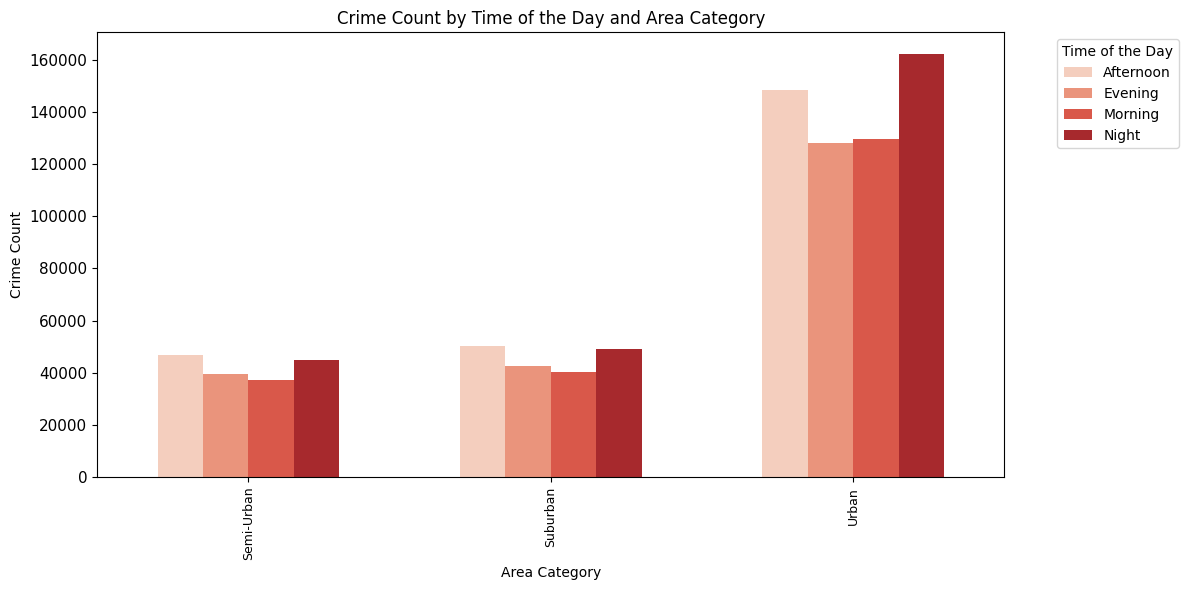

In [42]:
# Group the data by 'time_of_the_day' and 'area_name' and count occurrences
crime_count_by_time_area = df_crimef.groupby(['time_of_the_day', 'area_category']).size().reset_index(name='count')

# Plotting the crime count with respect to 'time_of_the_day' and 'area_category'
plt.figure(figsize=(12, 6))
sns.barplot(x='area_category', y='count', hue='time_of_the_day', data=crime_count_by_time_area, palette='Reds', width=0.6)

# Customize the plot
plt.title('Crime Count by Time of the Day and Area Category')
plt.xlabel('Area Category')
plt.ylabel('Crime Count')
plt.xticks(rotation=90, fontsize=9)  
plt.yticks(rotation=0, fontsize=11)
plt.legend(title='Time of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

**CRIME COUNT BY AGE GROUP**

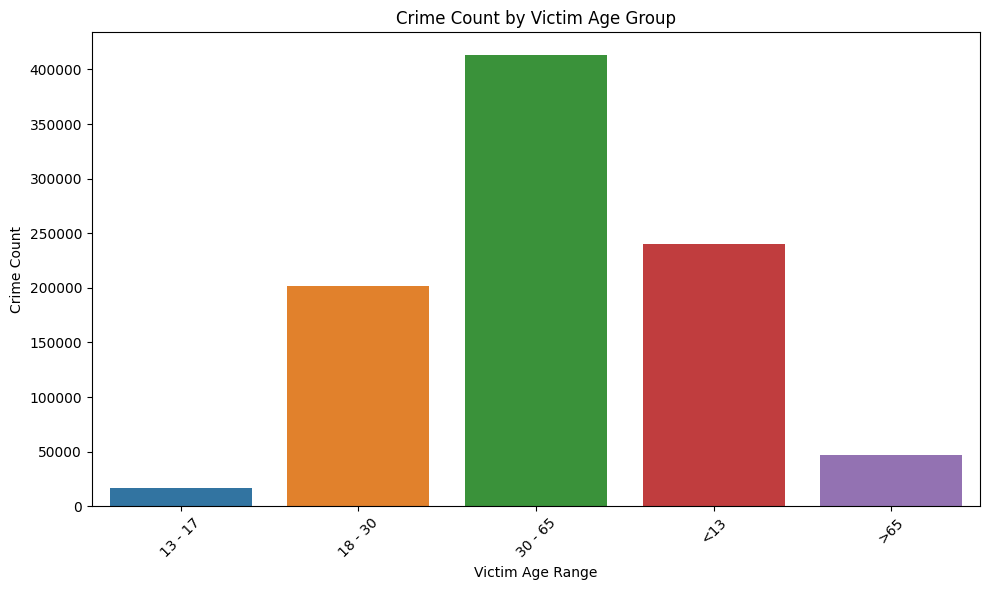

In [43]:
# Group by 'victim_age_range' and count occurrences
age_group_crime_count = df_crimef.groupby('victim_age_range').size().reset_index(name='crime_count')

# Plotting the data using Seaborn Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='victim_age_range', y='crime_count', data=age_group_crime_count)

# Customize the plot
plt.title('Crime Count by Victim Age Group')
plt.xlabel('Victim Age Range')
plt.ylabel('Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

**CRIME COUNT BY VICTIM AGE & SEX**

In [44]:
df_original = df_crimef[df_crimef['victim_sex'] != '-']
# Unique values
df_original['victim_sex'].unique()

# Value counts (frequency of each unique value)
df_original['victim_sex'].value_counts()

victim_sex
M          376367
F          335474
Unknown    122077
X           84408
H             105
Name: count, dtype: int64

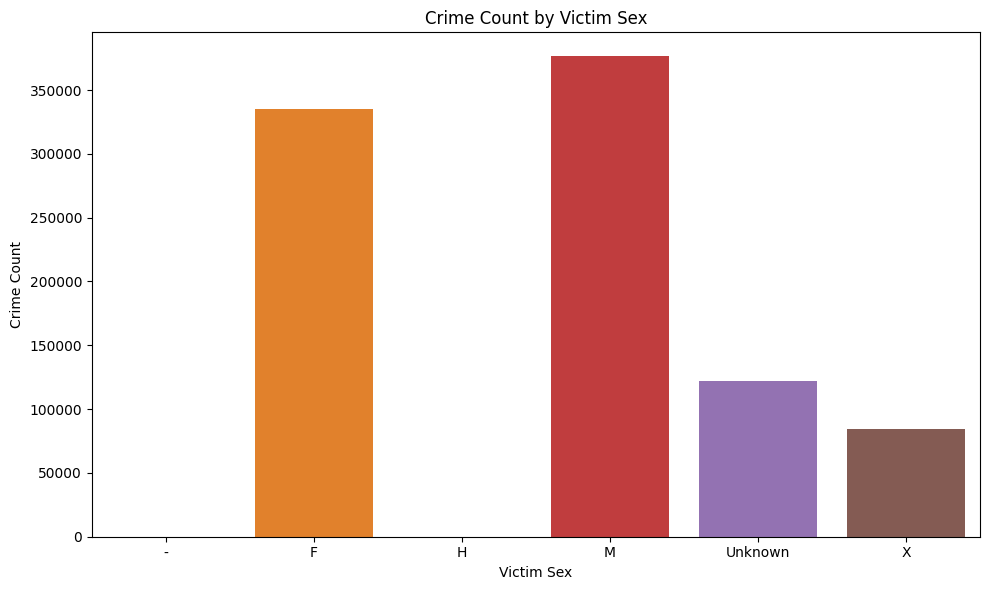

In [45]:
# Group by 'victim_sex' and count occurrences
victim_sex_crime_count = df_crimef.groupby('victim_sex').size().reset_index(name='crime_count')

# Plotting the data using Seaborn Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='victim_sex', y='crime_count', data=victim_sex_crime_count)

# Customize the plot
plt.title('Crime Count by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Crime Count')
plt.tight_layout()

# Show the plot
plt.show()

**Let's try to identify if young males (particularly in the 18-30 age range) are disproportionately affected and compare them with females.**

*Analyze the Distribution of Crimes by Age and Sex*

In [46]:
# Group by 'victim_sex' and 'victim_age_range' to calculate total crime counts
sex_age_crime_count = df_crimef.groupby(['victim_sex', 'victim_age_range']).size().reset_index(name='crime_count')

# Calculate the percentage of crimes for each group
sex_age_crime_count['percentage'] = (sex_age_crime_count['crime_count'] / sex_age_crime_count['crime_count'].sum()) * 100

# Display the crime counts and percentages
print(sex_age_crime_count)

   victim_sex victim_age_range  crime_count  percentage
0           -              <13            1    0.000109
1           F          13 - 17         9693    1.055386
2           F          18 - 30       103506   11.269860
3           F          30 - 65       192065   20.912272
4           F              <13         8157    0.888144
5           F              >65        22053    2.401158
6           H          13 - 17            1    0.000109
7           H          18 - 30           31    0.003375
8           H          30 - 65           64    0.006968
9           H              <13            3    0.000327
10          H              >65            6    0.000653
11          M          13 - 17         6694    0.728851
12          M          18 - 30        91025    9.910913
13          M          30 - 65       220191   23.974666
14          M              <13        33944    3.695864
15          M              >65        24513    2.669005
16    Unknown          18 - 30           18    0

*Visualize the Comparison*

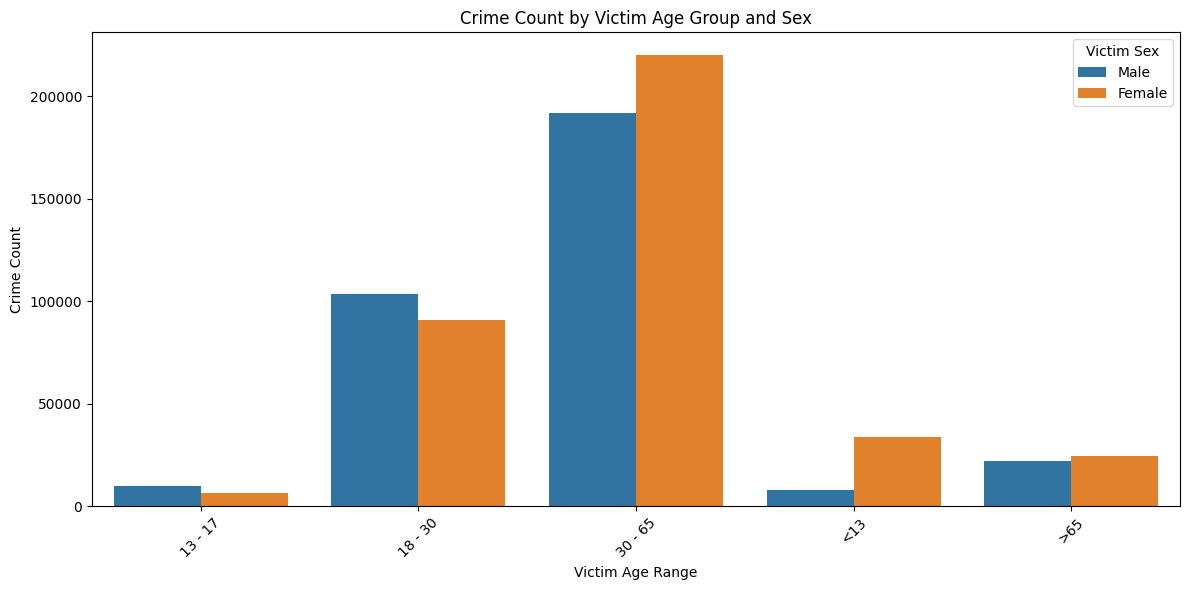

In [47]:
# Filter data for only males and females
sex_age_filtered = sex_age_crime_count[sex_age_crime_count['victim_sex'].isin(['M', 'F'])]

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='victim_age_range', y='crime_count', hue='victim_sex', data=sex_age_filtered, ci=None)

# Customize the plot
plt.title('Crime Count by Victim Age Group and Sex')
plt.xlabel('Victim Age Range')
plt.ylabel('Crime Count')
plt.legend(title='Victim Sex', labels=['Male', 'Female'])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

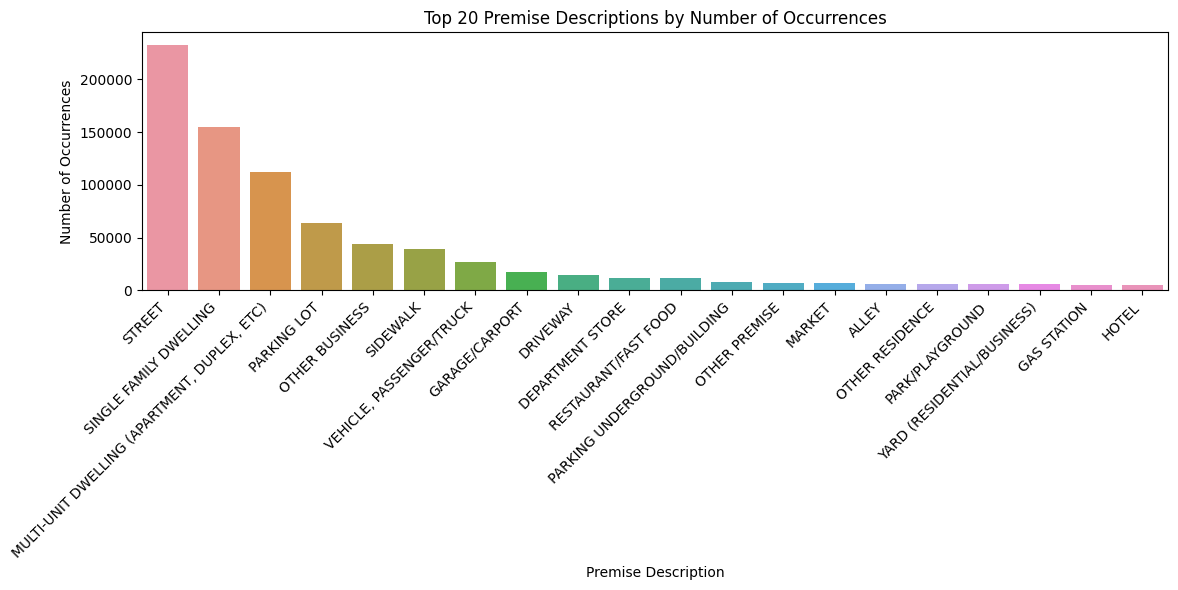

In [48]:
# Count occurrences of each unique value in 'premise_desc'
premise_desc_counts = df_crimef['premise_desc'].value_counts().head(20)

# Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x=premise_desc_counts.index, y=premise_desc_counts.values)

# Customize the plot
plt.title('Top 20 Premise Descriptions by Number of Occurrences')
plt.xlabel('Premise Description')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

**Our hypothesis was: "In Los Angeles, the rate of violent crimes peaks during summer months and nighttime hours (8 PM to 6 AM), particularly in lower-income neighborhoods (e.g., South LA). These incidents are more likely to involve young male victims (ages 18-30) and often occur in public spaces such as streets and parks."**

**As per our analysis, rate of crimes is highr at nighttime hours but not necessarily during summer months, rather in all seasons over the years it fluctuated so we cant conclude crimes increase in a specific season. As per age and sex of victims, males of middle ages over 30 are more victims while younger females face more crimes. And our hypothesis is correct that more crimes are done in public places like streets and parking lots but also single family and multi-unit dwellings also had more crimes than other premises.**

## Further analysis

**TOP CRIMES BY AREA**

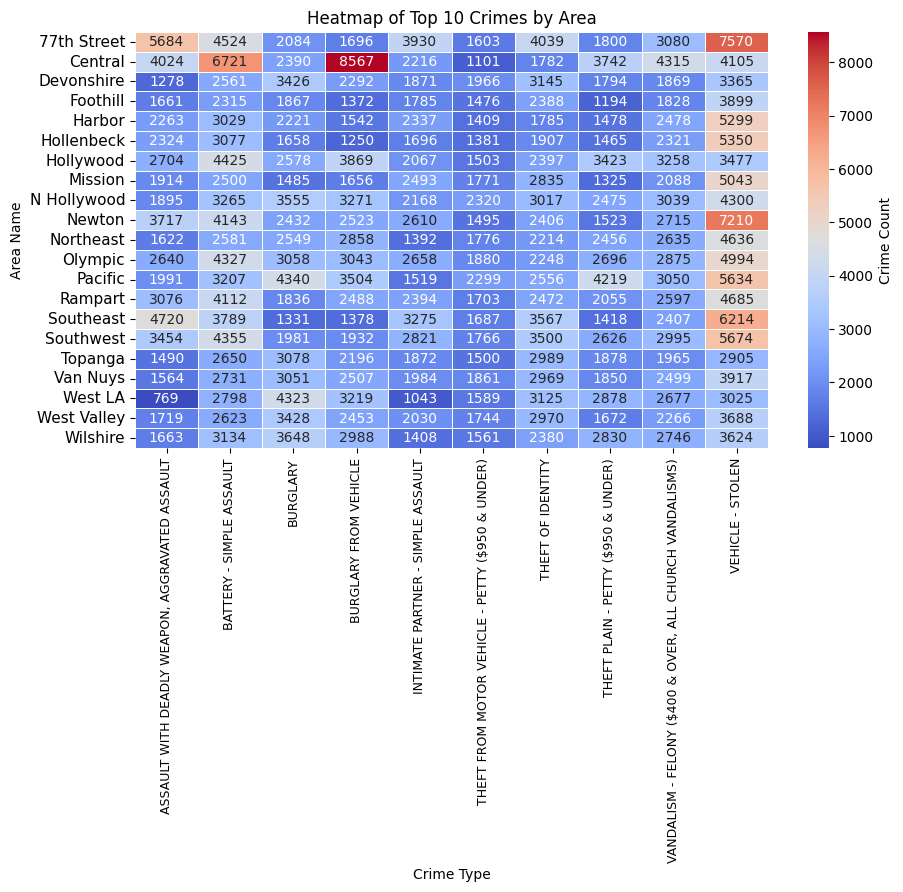

In [55]:
# Group by 'crime_code_desc' to find the total count of each crime type
top_crimes = df_original.groupby('crime_code_desc').size().nlargest(10).index
 
# Filter the dataframe to only include rows with top 10 crimes
df_top_crimes = df_original[df_original['crime_code_desc'].isin(top_crimes)]
 
# Group by 'area_name' and 'crime_code_desc' to get counts
crime_area_count = df_top_crimes.groupby(['area_name', 'crime_code_desc']).size().reset_index(name='count')
 
# Pivot the data for heatmap
crime_area_pivot = crime_area_count.pivot(index='area_name', columns='crime_code_desc', values='count').fillna(0)
 
# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crime_area_pivot, cmap='coolwarm', linewidths=0.5, annot=True, fmt=".0f", cbar_kws={'label': 'Crime Count'})
 
# Customize the plot
plt.title('Heatmap of Top 10 Crimes by Area')
plt.xlabel('Crime Type')
plt.ylabel('Area Name')
 
plt.xticks(rotation=90, fontsize=9)  
plt.yticks(rotation=0, fontsize=11)
 
plt.tight_layout(pad=3.0)
plt.subplots_adjust(bottom=0.2)
 
# Show the plot
plt.show()

**TOP WEAPON TYPES BY AREA**

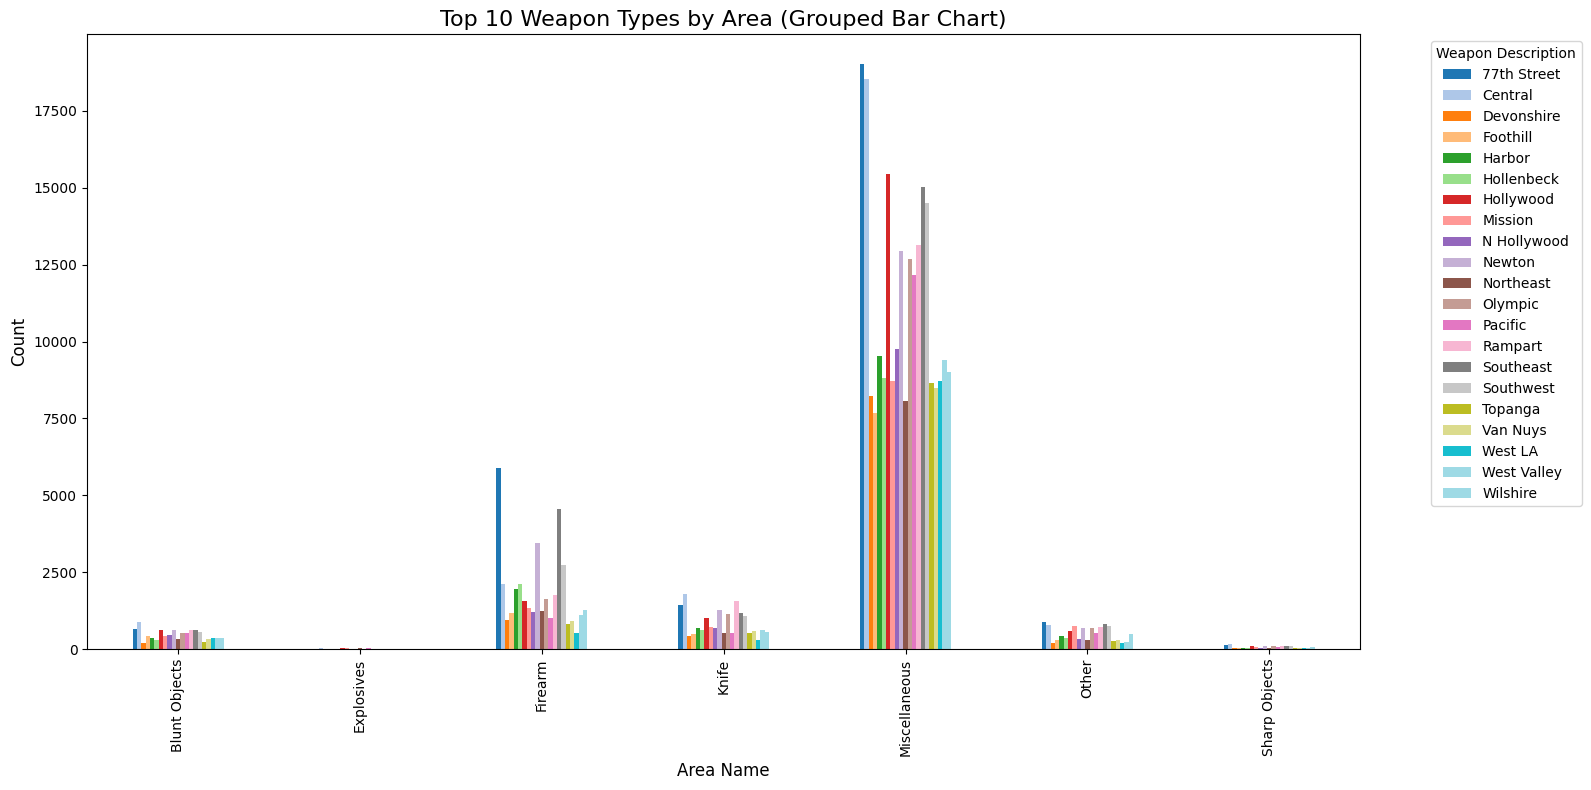

In [73]:
# Plot a grouped bar chart
weapon_area_counts.plot(kind='bar', figsize=(16, 8), colormap='tab20')

# Add labels and title
plt.title('Top 10 Weapon Types by Area (Grouped Bar Chart)', fontsize=16)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Weapon Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**CRIME COUNT BY STATUS DESCRIPTION**

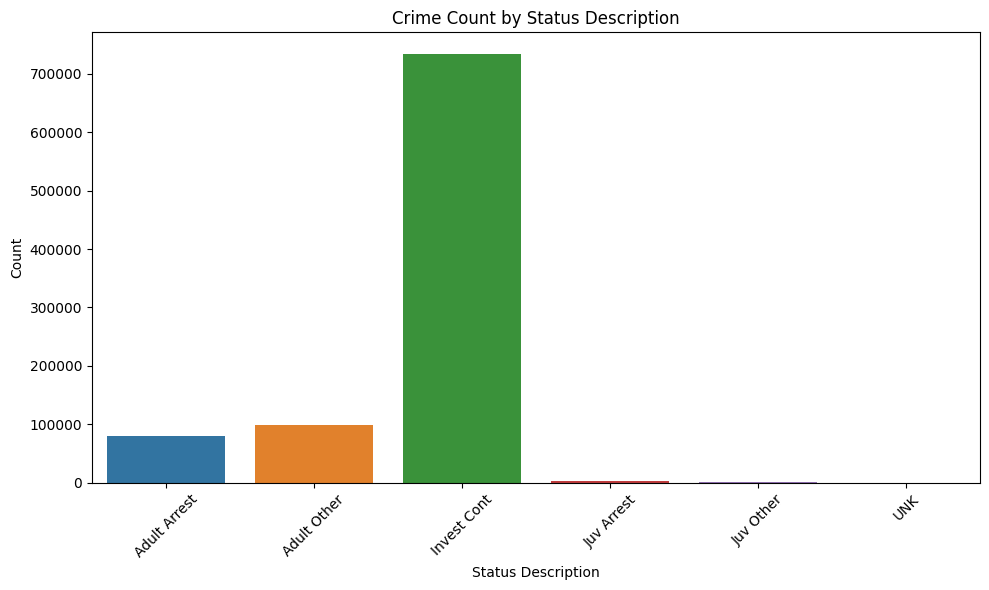

In [49]:
# Group by 'status_desc' and count occurrences in df_original
status_count = df_original.groupby('status_desc').size().reset_index(name='count')

# Plotting the data using Seaborn Bar Plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='status_desc', y='count', data=status_count, ci=None)

# Customize the plot
plt.title('Crime Count by Status Description')
plt.xlabel('Status Description')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

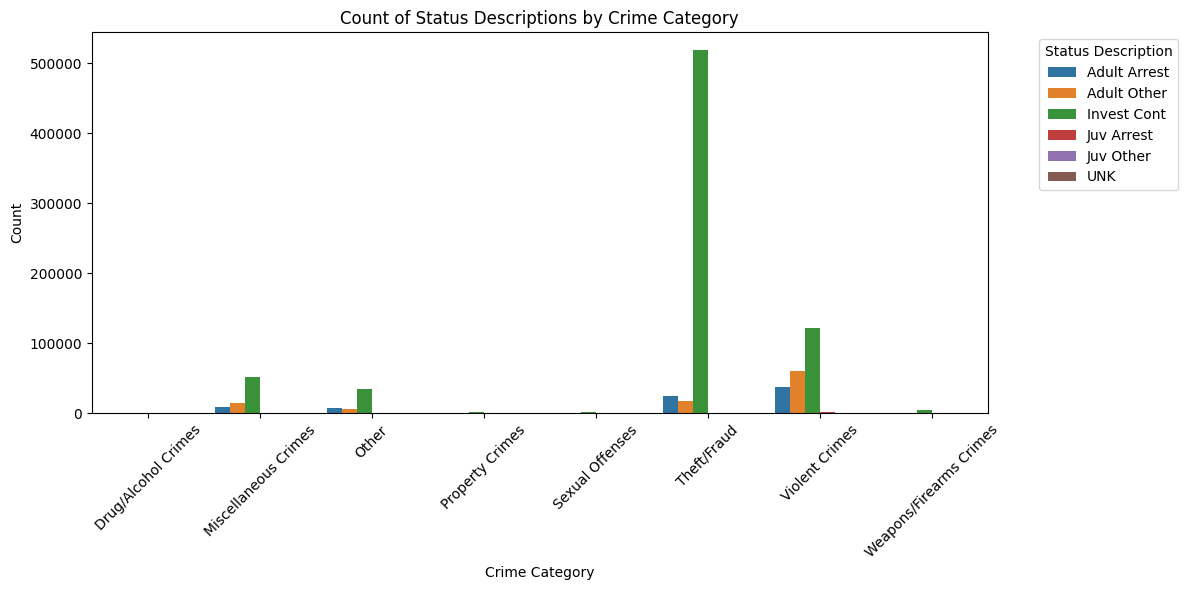

In [50]:
# Group by 'crime_category' and 'status_desc' and count occurrences in df_original
status_crime_count = df_original.groupby(['crime_category', 'status_desc']).size().reset_index(name='count')

# Plotting the data using Seaborn Bar Plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='crime_category', y='count', hue='status_desc', data=status_crime_count, ci=None)

# Customize the plot
plt.title('Count of Status Descriptions by Crime Category')
plt.xlabel('Crime Category')
plt.ylabel('Count')
plt.legend(title='Status Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Theft/fraud crimes have the highest number of continuing investigations, followed by violent crimes.

In [51]:
# Renaming values in the 'category' column
df_original['victim_descent'] = df_original['victim_descent'].replace({'A': 'Other Asian', 'B': 'Black', 'C': 'Chinese', 'D': 'Cambodian', 'F': 'Filipino', 'G': 'Guamanian', 'H': 'Hispanic/Latin/Mexican', 'I': 'American Indian/Alaskan Native', 'J': 'Japanese', 'K': 'Korean', 'L': 'Laotian', 'O': 'Other', 'P': 'Pacific Islander', 'S': 'Samoan', 'U': 'Hawaiian', 'V': 'Vietnamese', 'W': 'White', 'X': 'Unknown', 'Z': 'Asian Indian'})

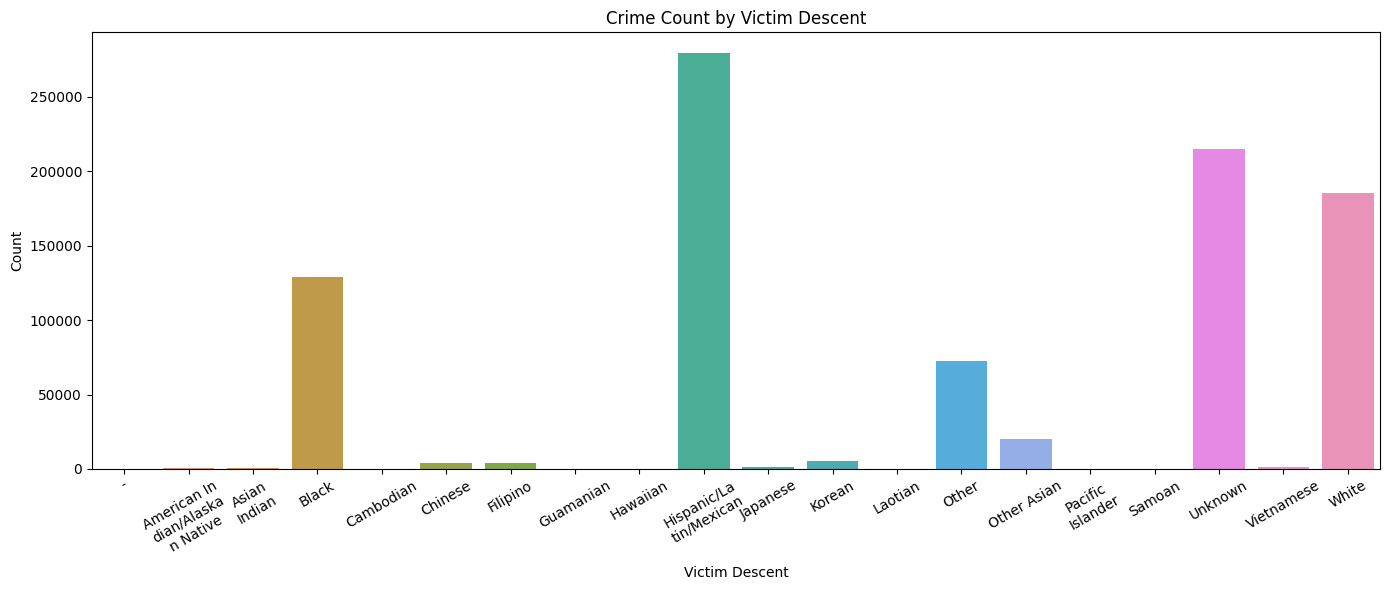

In [52]:
import textwrap

# Group by 'victim_descent' and count occurrences in df_original
victim_descent_count = df_original.groupby('victim_descent').size().reset_index(name='count')

# Plotting the data using Seaborn Bar Plot
plt.figure(figsize=(14, 6))
bar_plot = sns.barplot(x='victim_descent', y='count', data=victim_descent_count, ci=None)

# Customize the plot
plt.title('Crime Count by Victim Descent')
plt.xlabel('Victim Descent')
plt.ylabel('Count')

# Wrap the x-axis labels using textwrap
max_label_width = 11  # Define the maximum width for each label
wrapped_labels = [textwrap.fill(label, max_label_width) for label in victim_descent_count['victim_descent']]

# Set the wrapped labels on the x-axis
bar_plot.set_xticklabels(wrapped_labels, rotation = 30)

# Show the plot
plt.tight_layout()  # Adjust layout to ensure labels fit within the plot
plt.show()

Victims of certain descents are more in numbers than others.